# Proyecto 04 - Integrador Final

Resumen del proyecto:
- Profundiza y ajusta la resolución de tus proyectos. Agrega una fuente de datos, prueba un modelo nuevo o responde una pregunta nueva. Elabora un informe final que describa el proceso de toma de decisiones. Sustenta la razón por la cual usaste las librerías y aplicaste los métodos al dataset. Todos tus hallazgos deberán ser comunicados en función de la problemática y las preguntas que buscabas responder.



Elige tu punto de partida entre dos opciones:
- Tus Proyectos 01 y 02
- Tu Proyecto 03

Si corresponde, emprolija lo hecho hasta el momento, incorporando las correcciones y/o sugerencias que hayas recibido de tu(s) evaluador/a (es/as).

- Formula una nueva pregunta, problema o desafío para explorar. Aquí hay una lista no exhaustiva de opciones que puedes elegir:
- Prueba un modelo de Machine Learning nuevo que no hayas visto en la carrera. En ese caso, debes explicar su funcionamiento y por qué consideras apropiado aplicarlo. La ganancia no necesariamente tiene que ser en desempeño, también puede ser en interpretabilidad o aplicabilidad.
- Agrega al proyecto información de otra fuente. ¡Es sumamente válido! En ese caso, debe estar claramente explicado cómo conseguiste esos datos y qué usos esperas darles. Los datos deben ser accesibles por tu evaluador/a (por ejemplo, puedes subirlos al repositorio). Presta atención a la sensibilidad y privacidad de los datos antes de compartirlos.
- Continúa el Análisis Exploratorio de Datos. Recuerda que es tan importante como entrenar un modelo de Machine Learning.
- Sigue las sugerencias que te propusimos en los notebooks para continuar el Proyecto 03.

**Plantea un objetivo alcanzable. En esta etapa de tu formación, es preferible un problema sencillo bien abordado que uno ambicioso que no sabes cómo abordar. El objetivo debe estar correctamente explicitado. Debes explicar qué quieres hacer y qué esperas encontrar. Imagina que es una tarea en tu trabajo y tienes que explicarle a un/a jefe/a qué vas a hacer y por qué.**


El siguiente proyecto integrador final es una extensión del [Proyecto N°3 de Acamica](https://github.com/ciromzz/Flujo-VehicularBsAs), clickeando se rediccionara al repositorio de GIT con el proyecto. 
El objetivo será la implementación de la predicción del flujo vehicular para el año 2020 con la implementación de nuevos modelos que no se han probado hasta ahora, llamados VAR (Vectores Autorregresivos) y VARMAX (Vectores Autorregresivos de Media Movil con Regresores Exogenos), el cual nos permite predecir una serie de tiempo por medio de multiples series de tiempo. Siguiendo en esta linea, veremos como repercute el nivel de [actividad economica](https://www.indec.gob.ar/indec/web/Nivel4-Tema-3-9-48) (INDEC) en el transito vehicular para la autopista Illia con pago en efectivo que nos provee [AUSA](https://data.buenosaires.gob.ar/dataset/flujo-vehicular-por-unidades-peaje-ausa), y por otro lado, ver tambien si un aumento o disminución en [Empleo registrado del sector privado](https://charts.alphacast.io/grapher/argentina---main-labor-indicators?tab=chart&stackMode=absolute&year=latest&time=2001-09-01..2020-09-01) afecta el volumen el transito vehicular junto al nivel de [produccion total de autos, y sus ventas](https://charts.alphacast.io/datasets/5600). 
Dado que vamos a sumar los dataset del 2017 a 2020, la idea será comparar los datos predichos con los datos originales mediante la evaluación de los errores para ver que tan eficiente son.

El ciclo de trabajo será el siguiente:
- Análisis Exploratorio de datos;
- Modelización y pruebas;
- Conclusión Final.

In [119]:
# Importamos las librerías basicas para el siguiente trabajo, Pandas para el trabajo con el dataset, numpy para de calculo,
# y matplotlib para graficar junto con seaborn para expandir sus funcionalidades a parte de darle un mejor aspecto a las
# graficas. 
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
sns.set()

### **Preparación del Dataset**
Para comenzar, importamos todos los dataset que vamos a utilizar para el proyecto. Cada dataset tendra su arreglo correspondiente para poder manipularlos de la mejor manera, por lo que a lo largo de los arreglos iré definiendo el origen de los datasets y qué fue exactamente lo que hice con ellos.

In [120]:
data_2020 = pd.read_csv('flujo-vehicular-2020.csv', sep =',')
data_2019 = pd.read_csv('flujo-vehicular-2019.csv', sep =',')
data_2018 = pd.read_csv('flujo-vehicular-2018.csv', sep =',')
data_2017 = pd.read_csv('flujo-vehicular-2017.csv', sep =',')
data_trabajo = pd.read_csv("argentina-main-labor-indicators.csv",sep=",")
data_emae = pd.read_csv('EMAE-edit.csv', sep =',')
data_produccion = pd.read_csv('Automotive Production.csv', sep =',')

In [121]:
# Empezamos arreglando el dataset del proyecto 3. Acá la diferencia es que el dataset del 2020 es muy 
# distinto a estos 3, por lo que lo arreglare aparte. 

#Unimos los 3 datasets, podemos hacerlo asi directamente ya que tienen las mismas columnas
dataset = pd.concat([data_2019, data_2018, data_2017])

#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo
mask = np.logical_and(dataset.estacion=='Illia', dataset.forma_pago == 'EFECTIVO')
dataset = dataset[mask]

#Quitamos las columnas que no vamos a utilizar
dataset.drop(columns = ['hora_inicio','forma_pago', 'estacion'], inplace = True)

#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
dataset['fecha2'] = pd.to_datetime(dataset.fecha) + pd.to_timedelta(dataset.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
dataset.drop(columns=['fecha','hora_fin','periodo'], inplace = True)

#Corregimos el nombre de fecha2 a fecha
dataset.rename(columns = {'fecha2':'fecha'}, inplace = True) 

#Reordenamos el dataset por fecha
dataset.sort_values('fecha', inplace = True)
dataset.reset_index(drop=True, inplace = True)

#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable
diario = dataset.resample('D', on = 'fecha').sum().astype("float64")
diario

,cantidad_pasos
fecha,
2017-01-01,31183.0
2017-01-02,51568.0
2017-01-03,51093.0
2017-01-04,53332.0
2017-01-05,56486.0
...,...
2019-12-27,40182.0
2019-12-28,30681.0
2019-12-29,26259.0


In [122]:
# Chequeamos como esta compuesto el dataset del 2020 y ya notamos que si bien dice lo mismo que los 
# anteriores, tienen diferente formato. Es decir, por ejemplo, en "forma_pago" dice "Efectivo" en vez 
# de "EFECTIVO" como en los primeros 3. Son detalles a tener en cuenta para no cometer errores.
data_2020.info()
data_2020.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2533743 entries, 0 to 2533742
Data columns (total 13 columns):
 #   Column          Dtype  
---  ------          -----  
 0   periodo         float64
 1   fecha           object 
 2   mes             object 
 3   dia             object 
 4   dia_fecha       float64
 5   hora_inicio     float64
 6   hora_fin        float64
 7   estacion        object 
 8   tipo_vehiculo   object 
 9   forma_pago      object 
 10  observacion     object 
 11  sentido         object 
 12  cantidad_pasos  float64
dtypes: float64(5), object(8)
memory usage: 251.3+ MB


,periodo,fecha,mes,dia,dia_fecha,hora_inicio,hora_fin,estacion,tipo_vehiculo,forma_pago,observacion,sentido,cantidad_pasos
0,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ALBERDI,Auto,Efectivo,Efectivo,Centro,24.0
1,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ALBERDI,Auto,Efectivo,Efectivo,Provincia,80.0
2,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ALBERDI,Auto,Rec.Deuda,Paso en Infracción,Provincia,1.0
3,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ALBERDI,Auto,Rec.Deuda,Paso en infracción con Multa LPR,Centro,1.0
4,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ALBERDI,Auto,Rec.Deuda,Paso en infracción con Multa LPR,Provincia,1.0


In [123]:
data_emae.info()
data_emae.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 2 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Periodo                         48 non-null     object 
 1   Índice serie original
2004=100  48 non-null     float64
dtypes: float64(1), object(1)
memory usage: 896.0+ bytes


,Periodo,Índice serie original\n2004=100
0,2017-01-01,136.7
1,2017-02-01,132.6
2,2017-03-01,152.1
3,2017-04-01,152.2
4,2017-05-01,167.4


In [124]:
data_trabajo.info()
data_trabajo.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232 entries, 0 to 231
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           232 non-null    object 
 1   Exit rate      232 non-null    float64
 2   Turnover rate  232 non-null    float64
 3   Entry rate     232 non-null    float64
dtypes: float64(3), object(1)
memory usage: 7.4+ KB


,Date,Exit rate,Turnover rate,Entry rate
0,"Sep 1, 2001",2.4457,1.9751,1.5046
1,"Oct 1, 2001",2.3470,2.0063,1.6655
2,"Nov 1, 2001",2.4014,2.1634,1.9255
3,"Dec 1, 2001",2.7679,2.1622,1.5566
4,"Jan 1, 2002",3.0611,2.2068,1.3526


In [125]:
data_produccion.info()
data_produccion.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 62 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   Entity                                                                206 non-null    object 
 1   Year                                                                  206 non-null    object 
 2   Production - Total                                                    206 non-null    int64  
 3   Exports - Total                                                       206 non-null    int64  
 4   Sales - Total                                                         206 non-null    int64  
 5   Production - Cars                                                     206 non-null    int64  
 6   Exports - Cars                                                        206 non-null    int64  
 7  

,Entity,Year,Production - Total,Exports - Total,Sales - Total,Production - Cars,Exports - Cars,Sales - Cars,Production - Other Vehicles,Exports - Other Vehicles,...,Exports - Cars - current_prices_3m_yoy,Exports - Total - current_prices_3m_yoy,Production - Cars - current_prices_3m_yoy,Production - Total - current_prices_3m_yoy,Sales - Other Vehicles - current_prices_3m_yoy,Exports - Other Vehicles - current_prices_3m_yoy,Production - Other Vehicles - current_prices_3m_yoy,Sales to domestic market - Total - current_prices_3m_yoy,Sales to domestic market - Imported vehicles - current_prices_3m_yoy,Sales to domestic market - National vehicles - current_prices_3m_yoy
0,Argentina,2004-01-01,11725,4875,20870,7495,3275,16205,4230,1600,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Argentina,2004-02-01,12963,9806,19101,9197,6124,14024,3766,3682,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Argentina,2004-03-01,20742,9998,23527,14655,6896,17259,6087,3102,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Argentina,2004-04-01,19266,10461,23454,13368,7461,17805,5898,3000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Argentina,2004-05-01,20075,10324,26494,13483,7473,20053,6592,2851,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Arreglo 2020

In [126]:
# Como dijimos anteriormente, aca notamos otro detalle con respecto al nombre de la estación. Aquí 
# Illia esta todo en mayusculas.
print(data_2020['estacion'].unique())

['ALBERDI' 'AVELLANEDA' 'DELLEPIANE LINIERSLEPIANE CENTRO'
 'DELLEPIANE LINIERS' 'ILLIA' 'ILP' 'PB1' 'PB3' 'PB4' 'RETIRO' 'SALGUERO'
 'SARMIENTO' 'PB2']


In [127]:
#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo
mask = np.logical_and(data_2020.estacion=='ILLIA', data_2020.forma_pago == 'Efectivo')
data_2020 = data_2020[mask]

#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
data_2020['fecha2'] = pd.to_datetime(data_2020.fecha) + pd.to_timedelta(data_2020.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
data_2020.drop(columns=['fecha','hora_inicio','hora_fin','dia_fecha','periodo'], inplace = True)

#Corregimos el nombre de fecha2 a fecha
data_2020.rename(columns = {'fecha2':'fecha'}, inplace = True) 

#Reordenamos el dataset por fecha
data_2020.sort_values('fecha', inplace = True)
data_2020.reset_index(drop=True, inplace = True)

#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable
diario_2020 = data_2020.resample('D', on = 'fecha').sum().astype("float64")

# Finalmente, concatenamos la serie junto a las demás.
diario_peajes = pd.concat([diario, diario_2020])
diario_peajes

,cantidad_pasos
fecha,
2017-01-01,31183.0
2017-01-02,51568.0
2017-01-03,51093.0
2017-01-04,53332.0
2017-01-05,56486.0
...,...
2020-12-27,8434.0
2020-12-28,10311.0
2020-12-29,12036.0


#### Arreglo EMAE

In [128]:
data_emae = data_emae.rename(columns = {'Índice serie original\n2004=100':'EMAE_indice'}) 
emae = data_emae.EMAE_indice
emae.shape

(48,)

#### Arreglo Trabajo
Este Dataset junto al de la producción automotriz, fue brindado de la base de datos [Alphacast](https://www.alphacast.io/) que es parte de la Consultora Macroeconomica [Seido](http://seido-web.com/).

La misma brinda datasets resumidos y acomodados para su facil utilización (algo similar a lo que realicé con el dataset del Nivel de Actividad)

Este dataset presenta el ratio de entrada y salida del personal laboral en el sector privado, y un "Turnover rate" que es un promedio entre los valores de entrada y salida. Al ser tambien un dato mensual, no le brindaremos importancia a lo que corresponde con una fecha exacta, y solo nos quedaremos con ese promedio mensual.

In [129]:
# Nos quedamos con las columnas que nos interesan, la fecha y el promedio. Luego renombramos.
data_trabajo = data_trabajo[["Date","Turnover rate"]]
job = data_trabajo.rename(columns = {'Turnover rate':'work_mean'})

# Le damos formato fecha a "Date" y lo convertimos a indice.
job["fecha"] = pd.to_datetime(job.Date)
job.set_index("fecha",inplace=True)

# Quitamos la anterior columna de fechas y solo nos quedamos con los datos del 2017 en adelante.
job = job.drop(columns=["Date"], axis=1)
job = job[job.index > "2016-12-31"]
job.reset_index(drop=True, inplace = True)
job.shape

(48, 1)

#### Arreglo Producción Automotriz
Para este dataset, nos quedaremos con la produccion total que esta compuesta por autos y otros automoviles, y las ventas totales que corresponden a la venta de autos y otros vehiculos.

In [130]:
# Nos quedamos con las columnas que nos interesan, la fecha, produccion total y ventas totales.
# Luego renombramos.
data_produccion = data_produccion[["Year","Production - Total","Sales - Total"]]
produccion = data_produccion.rename(columns={"Year":"Año","Production - Total":"produc_total","Sales - Total":"ventas_total"})

# Este dataset cuenta con datos hasta el 2021, solo nos quedaremos con el 2017 hasta el 2020. El 2021
# es el que queremos predecir.
produccion = produccion[produccion.Año > "2016-12-31"]
produccion = produccion[produccion.Año < "2021-01-01"]

# Por ultimo resetiamos el indice para no tener problemas al concatenar y nos quedamos con las columnas
# que usaremos para trabajar. 
produccion.reset_index(drop=True, inplace = True)
produccion = produccion[["produc_total","ventas_total"]]
produccion.shape

(48, 2)

#### Resampleo y concatenación de las series
Notamos que, salvo los dataset de los peajes, todos los dataset economicos son datos mensuales por lo que no tenian una fecha y hora exacta de su registro, por lo que la estrategia a desarrollar será resamplear la serie de los peajes de manera mensual. 
Una vez llevado a cabo ese procedimiento, la concatenaremos con las demas series. Como vimos, al no haber fecha y hora especifica, no hay porque preocuparse por seguir una fecha de acontecimientos ya que estos datos son mas bien informativos y por eso son mensuales.

In [131]:
month = diario_peajes.resample("M").mean()
month = month.reset_index()
month.shape

(48, 2)

In [132]:
dataset = pd.concat([month, job, emae,produccion],axis=1)
dataset.sort_values("fecha",ascending=True)
dataset.set_index("fecha",inplace=True)
dataset

,cantidad_pasos,work_mean,EMAE_indice,produc_total,ventas_total
fecha,,,,,
2017-01-31,50492.258065,2.4353,136.7,26762,52841
2017-02-28,48682.607143,2.0940,132.6,25717,65274
2017-03-31,46813.354839,2.8359,152.1,39675,68947
2017-04-30,45799.500000,2.3812,152.2,37731,68117
2017-05-31,45391.483871,2.2133,167.4,45273,79521
2017-06-30,46948.800000,2.0370,161.7,45496,80172
2017-07-31,48478.064516,1.9926,149.8,38169,72684
2017-08-31,48136.516129,2.4251,149.4,45262,76700
2017-09-30,50644.233333,2.0557,146.7,46961,76192


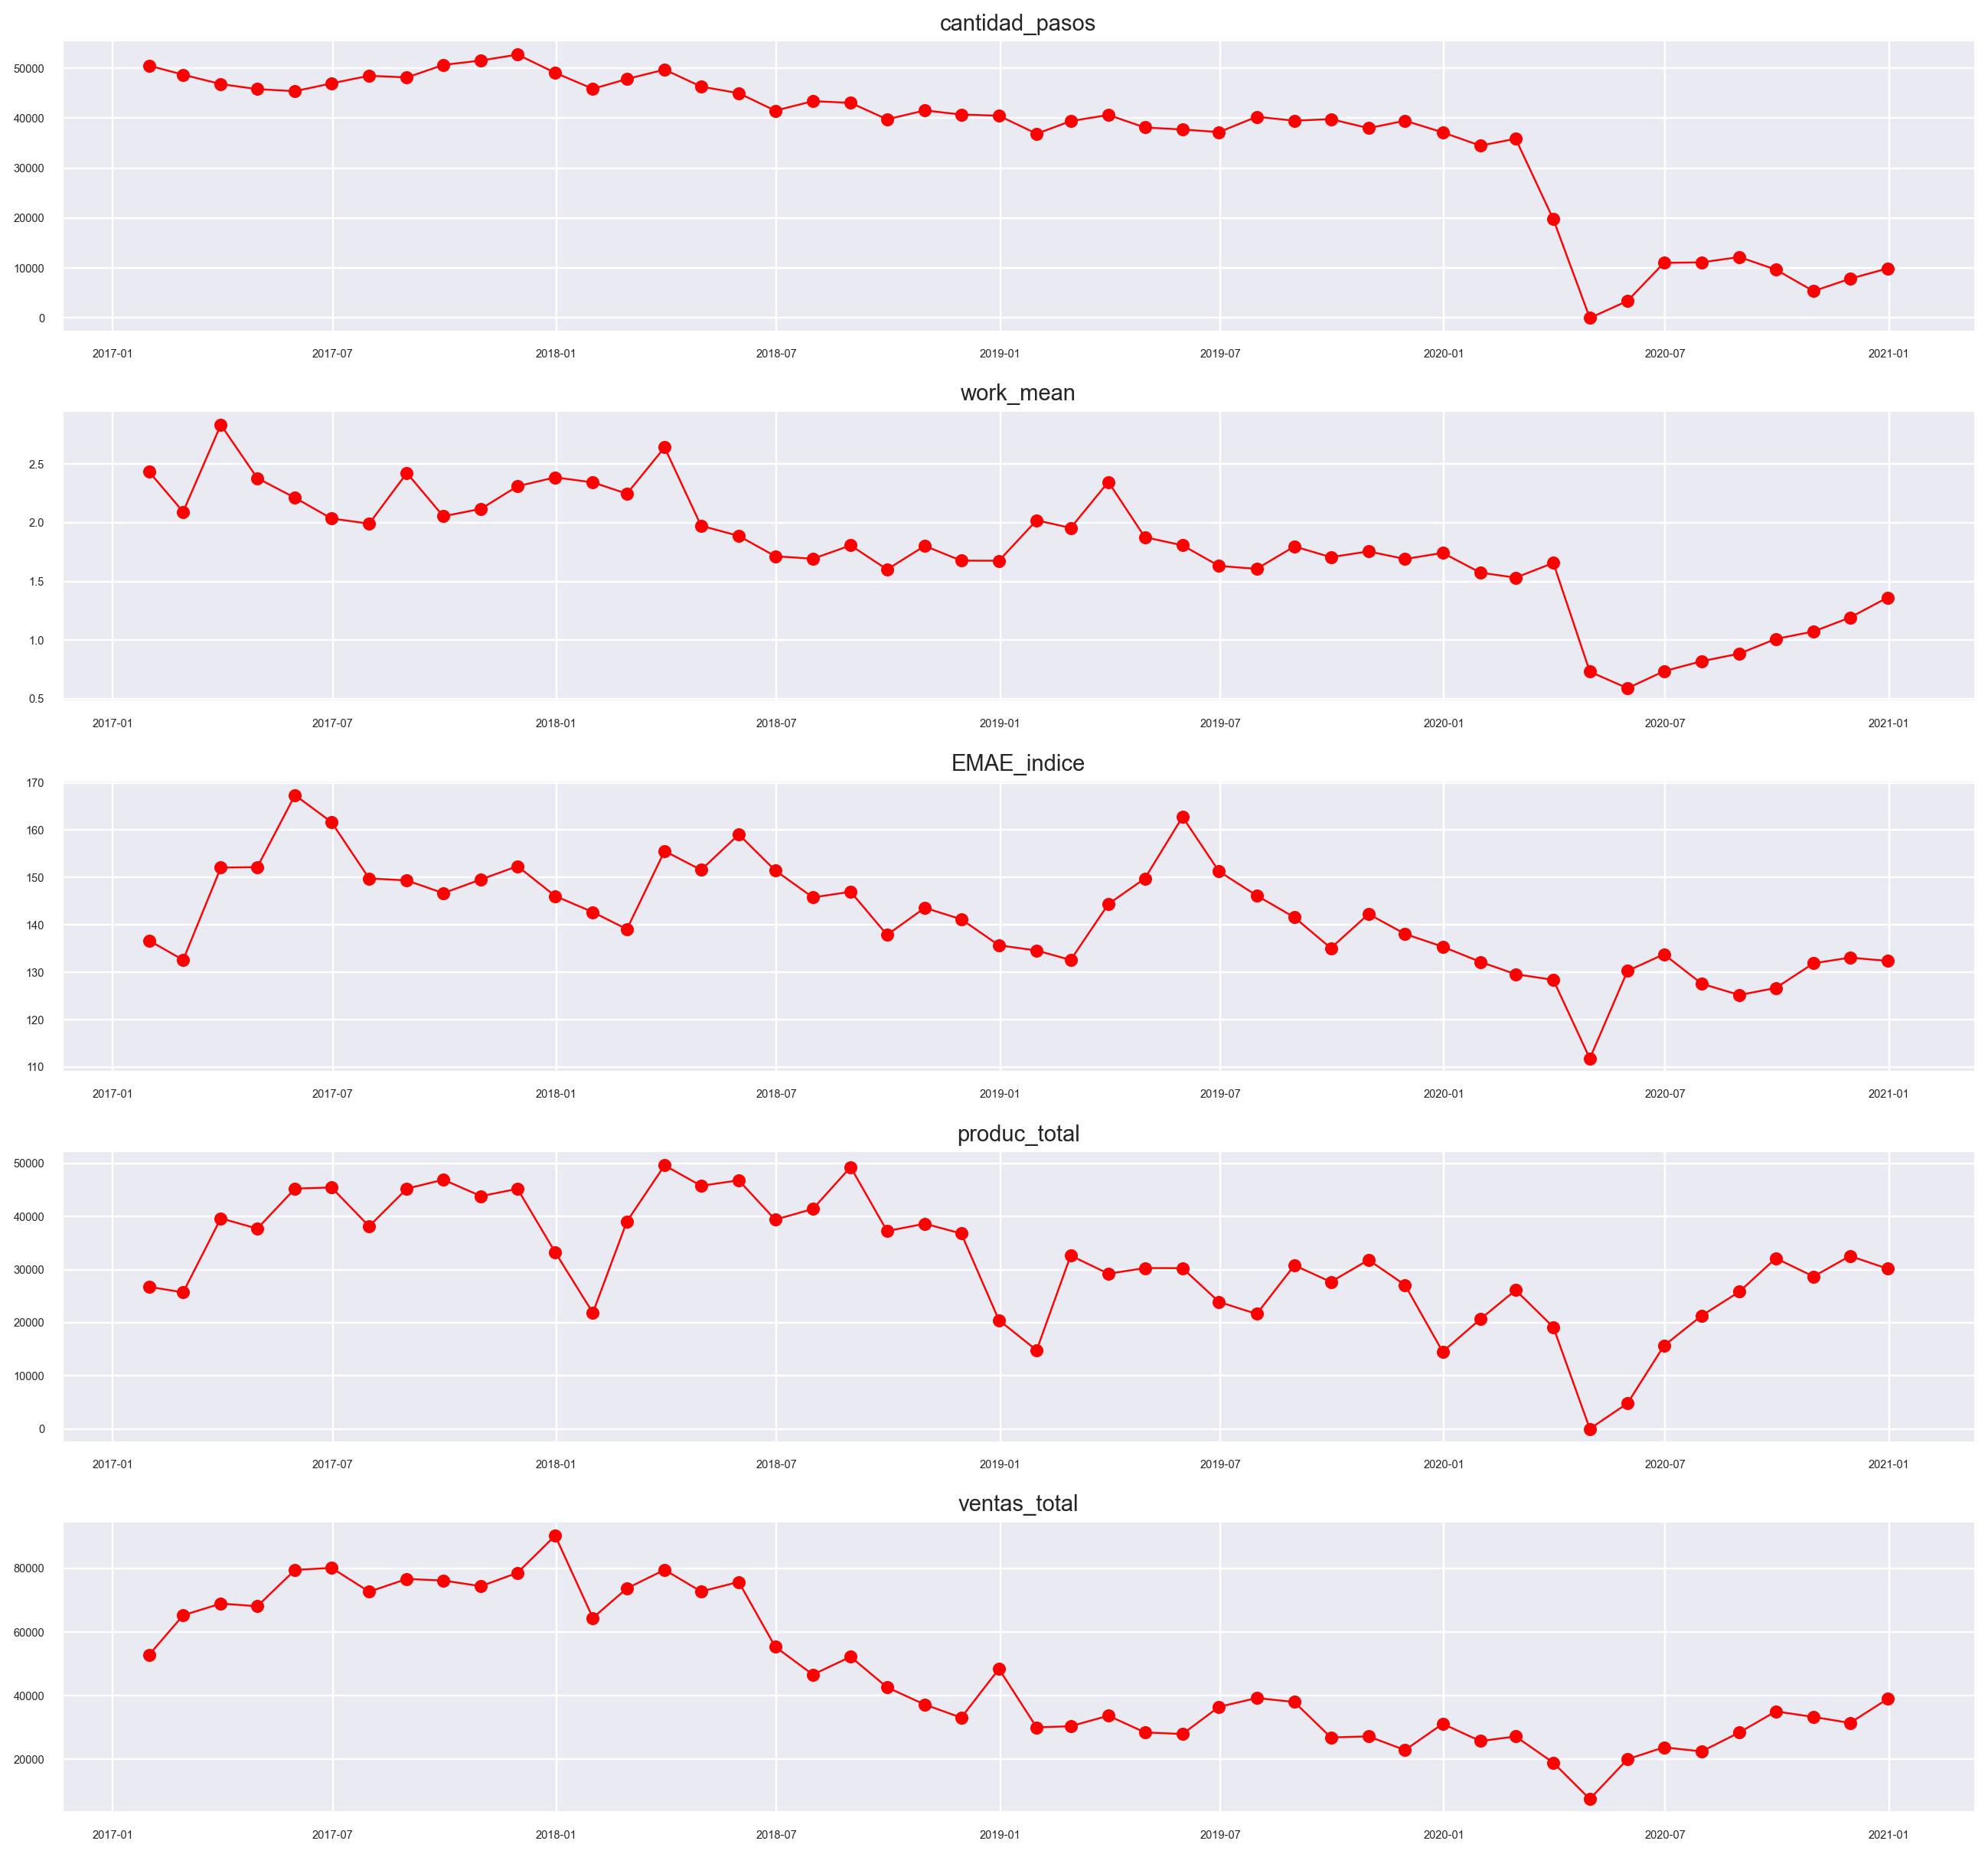

In [133]:
# Graficamos todas las variables que componen el Dataset.
fig, axes = plt.subplots(nrows=5, dpi=175, figsize=(15,14))
for i, ax in enumerate(axes.flatten()):
    data = dataset[dataset.columns[i]]
    ax.plot(data, color='red', linewidth=1, marker='o')
    
    ax.set_title(dataset.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

### **Analisis Exploratorio de Datos**

In [134]:
# Veamos las principales variables estadisticas que nos ofrece el nuevo dataset.
dataset.describe()

,cantidad_pasos,work_mean,EMAE_indice,produc_total,ventas_total
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,36139.116564,1.780552,141.764583,31500.645833,46895.229167
std,14927.798210,0.516332,11.149325,11452.641378,22034.329441
min,0.000000,0.588400,111.800000,0.000000,7512.000000
25%,36623.308120,1.605800,132.975000,25266.750000,28460.750000
50%,40373.661290,1.800650,141.950000,31324.500000,38507.500000
75%,46440.038710,2.100375,149.800000,39483.750000,69881.250000
max,52714.266667,2.835900,167.400000,49655.000000,90307.000000


<AxesSubplot:xlabel='cantidad_pasos', ylabel='Density'>

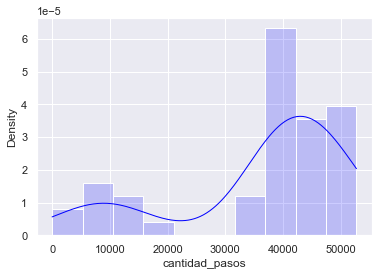

In [135]:
# Distribuciones
# Cantidad de pasos. 
sns.histplot(data = dataset.cantidad_pasos, stat = "density",kde = True, line_kws= {"linewidth":1},color = "blue",alpha= 0.2)

<AxesSubplot:xlabel='work_mean', ylabel='Density'>

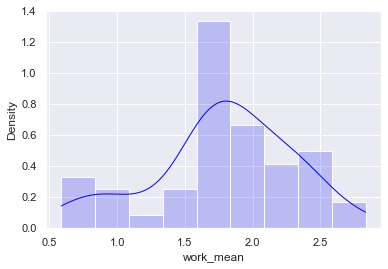

In [136]:
# Empleo registrado en Sector Privado
sns.histplot(data = dataset.work_mean, stat = "density",kde = True, line_kws= {"linewidth":1},color = "blue",alpha= 0.2)

<AxesSubplot:xlabel='EMAE_indice', ylabel='Density'>

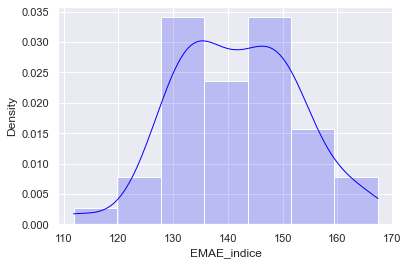

In [137]:
# Indice del Nivel de Actividad Economica
sns.histplot(data = dataset.EMAE_indice, stat = "density",kde = True, line_kws= {"linewidth":1},color = "blue",alpha= 0.2)

<AxesSubplot:xlabel='produc_total', ylabel='Density'>

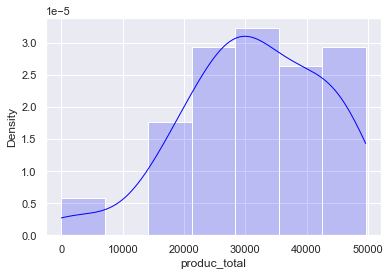

In [138]:
# Producción total de vehiculos
sns.histplot(data = dataset.produc_total, stat = "density",kde = True, line_kws= {"linewidth":1},color = "blue",alpha= 0.2)

<AxesSubplot:xlabel='ventas_total', ylabel='Density'>

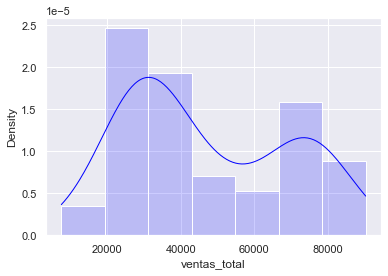

In [139]:
# Ventas totales de vehiculos
sns.histplot(data = dataset.ventas_total, stat = "density",kde = True, line_kws= {"linewidth":1},color = "blue",alpha= 0.2)

In [140]:
# importamos de la libreria de scikit learn un modelo de regresion para poder mostrar la tendencia de cada serie
from sklearn.linear_model import LinearRegression

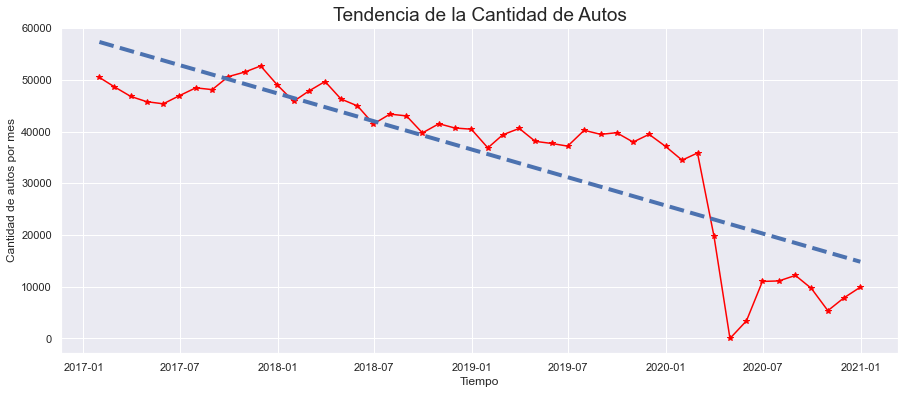

In [141]:
data_lr = dataset.copy()
data_lr["fecha_numeros"]=data_lr.index.map(datetime.datetime.toordinal)

lr = LinearRegression()
lr.fit(data_lr.fecha_numeros.values.reshape(-1, 1), data_lr.cantidad_pasos)

plt.figure(figsize = (15,6))
plt.plot(data_lr.index, data_lr.cantidad_pasos,marker='*',color="red")
plt.plot(data_lr.index, lr.predict(data_lr.fecha_numeros.values.reshape(-1, 1)), lw = 4,ls = "--")

plt.title("Tendencia de la Cantidad de Autos", size=19)
plt.xlabel("Tiempo")
plt.ylabel("Cantidad de autos por mes")
plt.show()

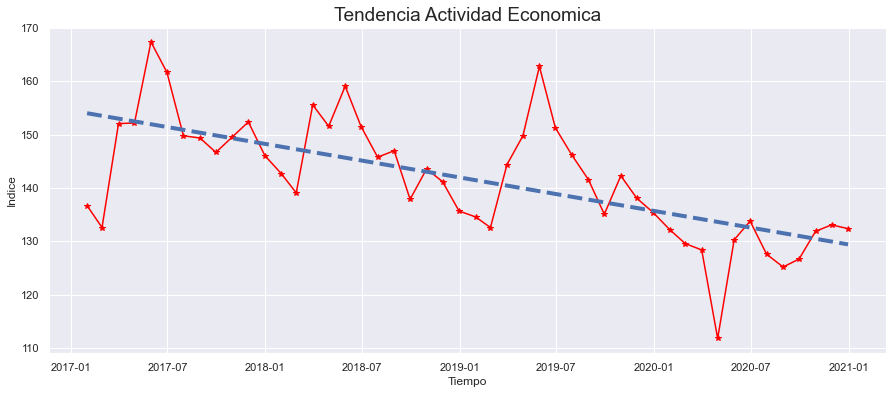

In [142]:
lr = LinearRegression()
lr.fit(data_lr.fecha_numeros.values.reshape(-1, 1), data_lr.EMAE_indice)

plt.figure(figsize = (15,6))
plt.plot(data_lr.index, data_lr.EMAE_indice,marker='*',color="red")
plt.plot(data_lr.index, lr.predict(data_lr.fecha_numeros.values.reshape(-1, 1)), lw = 4,ls = "--")

plt.title("Tendencia Actividad Economica",size=19)
plt.xlabel("Tiempo")
plt.ylabel("Indice")
plt.show()

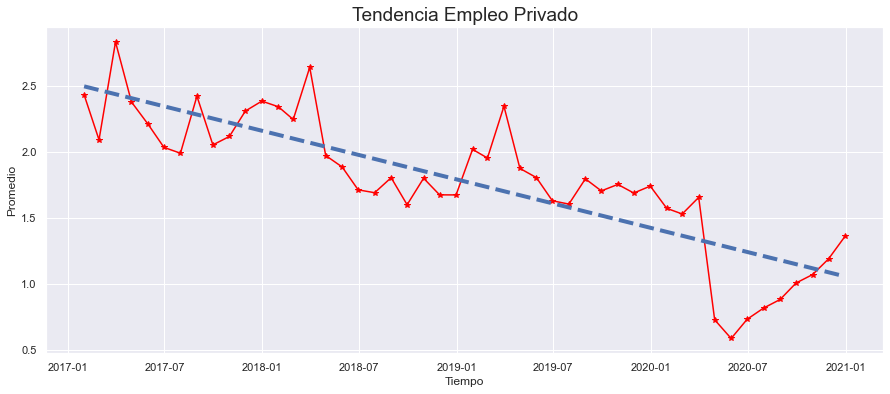

In [143]:
lr = LinearRegression()
lr.fit(data_lr.fecha_numeros.values.reshape(-1, 1), data_lr.work_mean)

plt.figure(figsize = (15,6))
plt.plot(data_lr.index, data_lr.work_mean,marker='*',color="red")
plt.plot(data_lr.index, lr.predict(data_lr.fecha_numeros.values.reshape(-1, 1)), lw = 4,ls = "--")

plt.title("Tendencia Empleo Privado",size=19)
plt.xlabel("Tiempo")
plt.ylabel("Promedio")
plt.show()

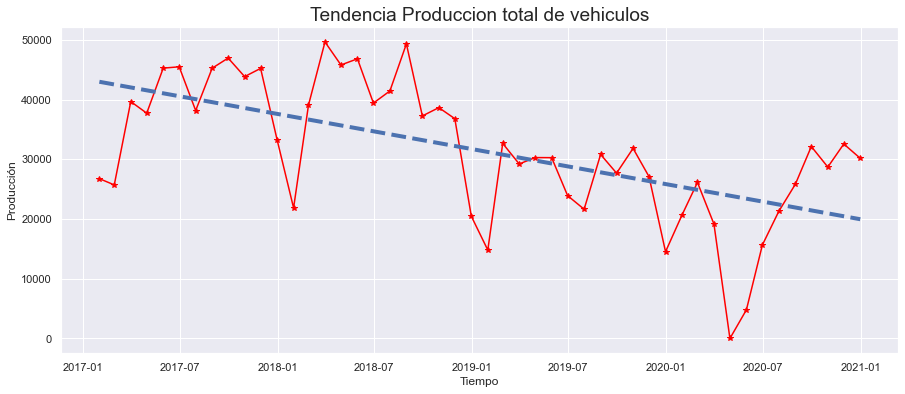

In [144]:
lr = LinearRegression()
lr.fit(data_lr.fecha_numeros.values.reshape(-1, 1), data_lr.produc_total)

plt.figure(figsize = (15,6))
plt.plot(data_lr.index,data_lr.produc_total,marker='*',color="red")
plt.plot(data_lr.index, lr.predict(data_lr.fecha_numeros.values.reshape(-1, 1)), lw = 4,ls = "--")

plt.title("Tendencia Produccion total de vehiculos",size=19)
plt.xlabel("Tiempo")
plt.ylabel("Producción")
plt.show()

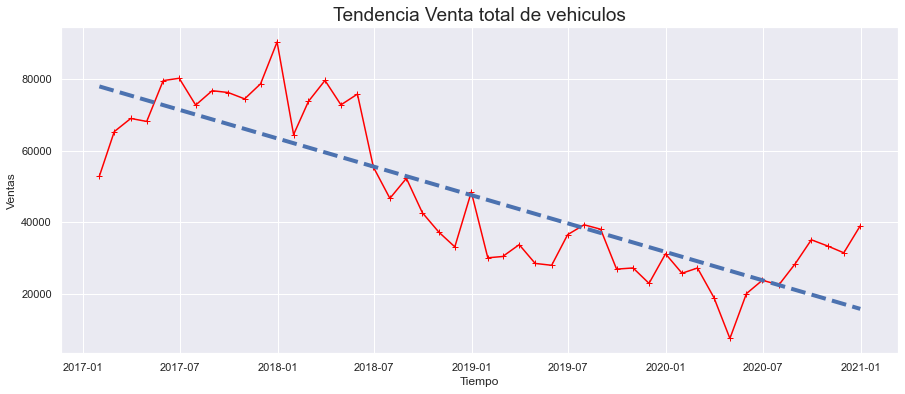

In [145]:
lr = LinearRegression()
lr.fit(data_lr.fecha_numeros.values.reshape(-1, 1), data_lr.ventas_total)

plt.figure(figsize = (15,6))
plt.plot(data_lr.index, data_lr.ventas_total,marker="+",color="red")
plt.plot(data_lr.index, lr.predict(data_lr.fecha_numeros.values.reshape(-1, 1)), lw = 4,ls = "--")

plt.title("Tendencia Venta total de vehiculos",size=19)
plt.xlabel("Tiempo")
plt.ylabel("Ventas")
plt.show()

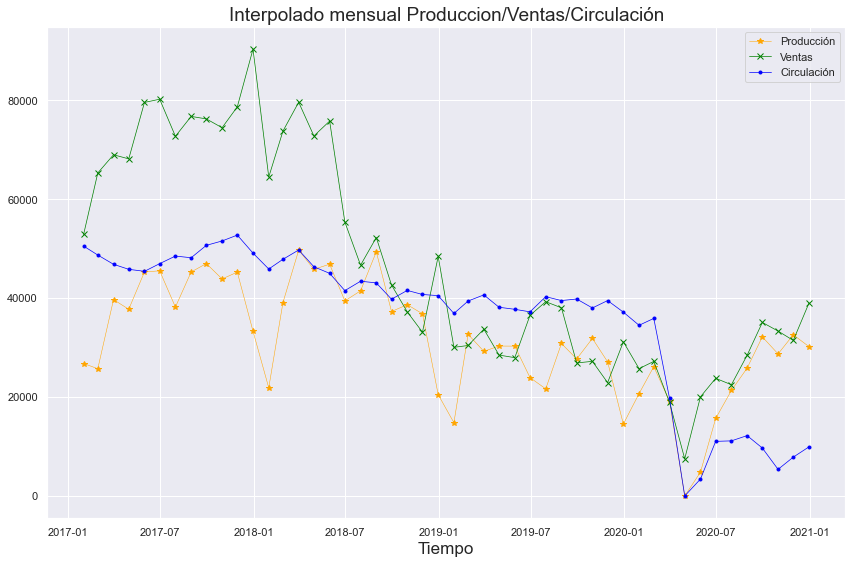

In [146]:
plt.figure(figsize=(12,8))
plt.plot(dataset.produc_total, marker='*', linestyle='-', linewidth=0.5, label='Producción', color='orange')
plt.plot(dataset.ventas_total, marker='x', linestyle='-', linewidth=0.7, label='Ventas', color='green')
plt.plot(dataset.cantidad_pasos, marker='.', linestyle='-', linewidth=0.7, label='Circulación', color='blue')
plt.xlabel('Tiempo', size= 17)
plt.title('Interpolado mensual Produccion/Ventas/Circulación', size= 19)
plt.legend()
plt.tight_layout()
plt.show()

Para este grafico es interesante analizarlo desde el punto de vista de la producción ya que la misma presenta caracteristicas similares a la cantidad de pasos en el peaje. 
A comienzos del 2017 vemos que las tres series de tiempo tienen distintos origenes y comportamientos, siendo el mas marcado el que representa "ventas", que aumenta exponencialmente para ese año. Para 2017, el comportamiento de la produccion de vehiculos y el flujo vehicular es similar, siendo igualmente mas volatil la producción. 
Sin embargo, apreciamos que para febrero de 2018, las tres series de tiempo bajan y luego suben hasta Abril de ese año donde las tres tambien tienen su pico maximo (Si bien la produccion y las ventas vuelven a subir marcadamente despues, solo para esa fecha suben las tres en conjunto), este "rebote" solo se verá una vez en la serie.
Para un primer análisis de este comportamiento, sabemos que la economía crecio para ese año (siendo el ultimo tambien en crecer) por lo que no es de sospechar que se aprecie una expansion de manera agregada en los demas rubros. Sin embargo la [caida de febrero de 2018](https://www.lanacion.com.ar/economia/dolar/en-febrero-el-dolar-cerro-en-baja-despues-que-el-bcra-bajo-las-tasas-de-interes-nid2112923/), fue un reflejo de la volatilidad de la divisa estadounidense que afecta tanto la producción como ventas siendo un sector dependiente de materias primas importadas. La caida para la cantidad de pasos de autos puede deberse posiblemente a un bajo nivel de actividad economica. 
Para el resto de los siguientes años, mas que nada a finales de 2018 y comienzos del 2020, tiene un comportamiento mas similares (siendo la mas volatil la produccion). Finalmente, se aprecia el efecto cuarentena donde se plancha tanto la circulacion como la produccion, no asi las ventas (que puede deberse a factores contractuales en las ventas) pero que a comparación de otros meses, su caida es marcada. Por ultimo, se aprecia un rebote contrario que marca el minimo de toda la serie, esto se ve en mayo del 2020 y luego vuelve a crecer.

Mas adelante probaremos escalar los datos para apreciar mejor y de forma conjunta, como una serie puede estar afectando a otra y viceversa.

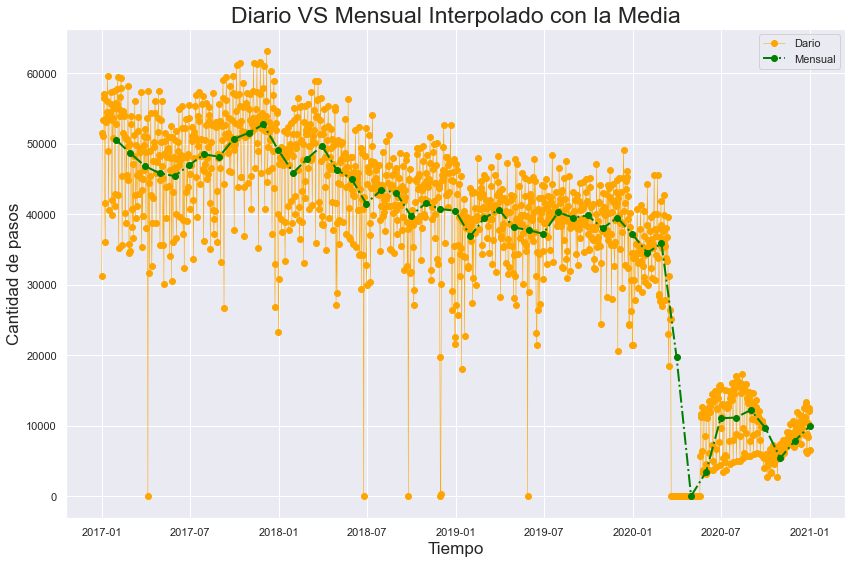

In [147]:
# Aquí solo comparamos el comportamiento mensual vs el diario para verificar si afecta significativamente a el diario al 
# mensual. Salvo los dos piquetes que acontecieron en 2018 entre Julio y Septiembre, no influyen demasiado en el comportamiento
# general.
# Vemos que cuando comienza la cuarenena (mediados de marzo) hasta casi Junio del 2020, NO hubo practicamente ningun paso 
# de vehiculos por ese peaje (efecto cuarentena).
plt.figure(figsize=(12,8))
plt.plot(diario_peajes, marker='o', linestyle='-', linewidth=0.5, label='Dario', color='orange')
plt.plot(dataset.cantidad_pasos, marker='o', linestyle='-.', linewidth=2, label='Mensual', color='green')
plt.xlabel('Tiempo', size= 17)
plt.ylabel('Cantidad de pasos', size= 17)
plt.title('Diario VS Mensual Interpolado con la Media', size= 23)
plt.legend()
plt.tight_layout()
plt.show()

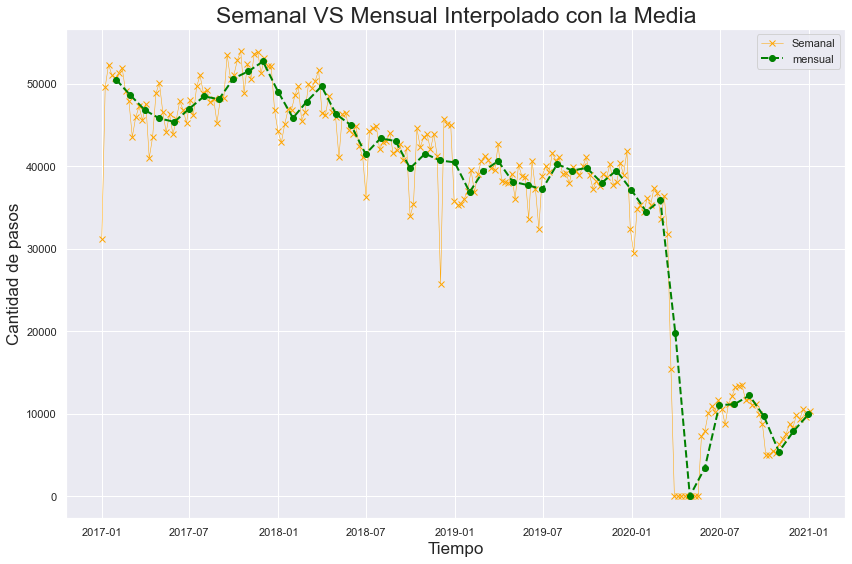

In [148]:
# Y aqui vemos que la series mensual funciona como una suerte de suavizado con respecto a la serie semanal. Salvo ciertos picos
# de la serie semanal, no vemos mayor interferencia en la serie mensual.
# Al igual que vimos en el grafico anterior, entre mediados de marzo hasta casi Junio del 2020 no hubo pasos por ese peaje.
sem = diario_peajes.resample("W").mean()
plt.figure(figsize=(12,8))
plt.plot(sem, marker='x', linestyle='-', linewidth=0.5, label='Semanal', color='orange')
plt.plot(dataset.cantidad_pasos, marker='o', linewidth=2, label='mensual',ls = "--", color='green')
plt.xlabel('Tiempo', size= 17)
plt.ylabel('Cantidad de pasos', size= 17)
plt.title('Semanal VS Mensual Interpolado con la Media', size= 23)
plt.legend()
plt.tight_layout()
plt.show()

No handles with labels found to put in legend.


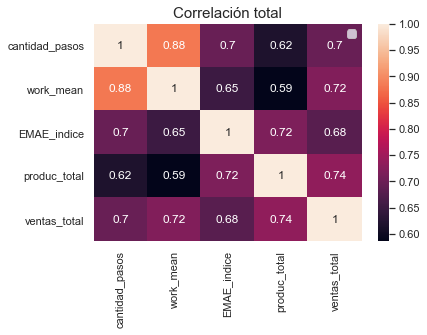

In [149]:
# Correlación.
sns.heatmap(dataset.corr(method = 'pearson'), annot = True)
plt.title('Correlación total', size= 15)
plt.legend()
plt.show()

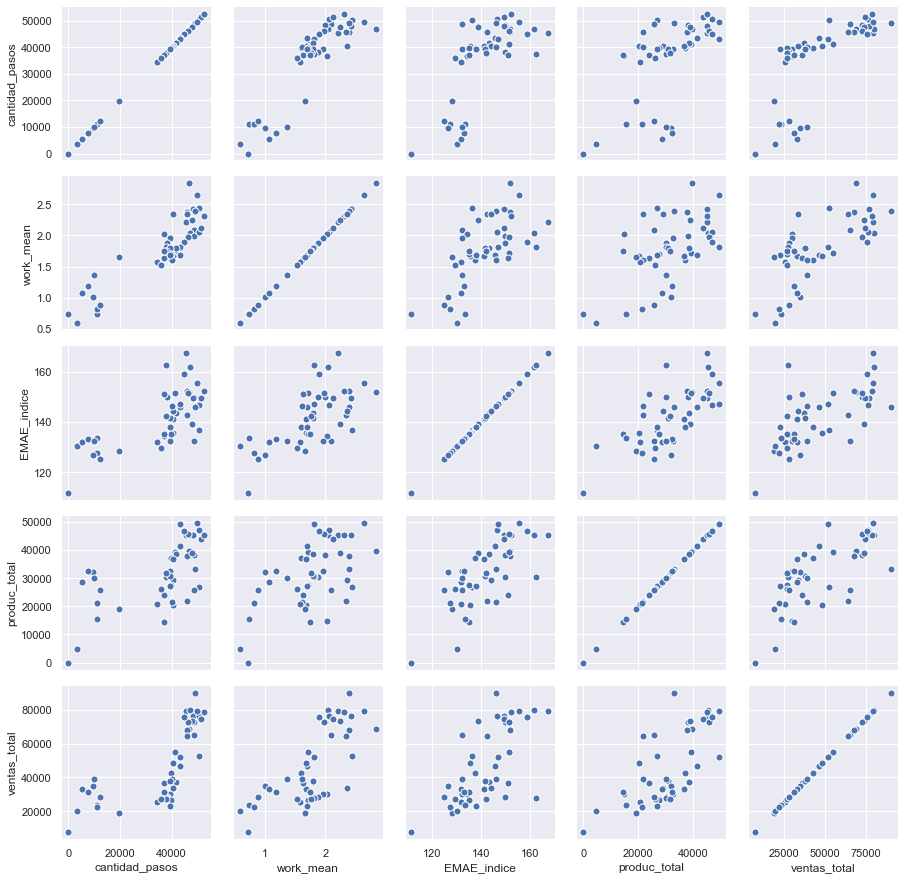

In [150]:
g = sns.PairGrid(dataset, palette="GnBu_d")
g.map(plt.scatter, s=50, edgecolor="white")
g.add_legend()

In [151]:
# Escalado de datos: Dado que contamos con un dataset con distintas magnitudes, vamos a escalarlos entre
# valores maximos y minimos para respetar la magnitud de cada uno pero que nos permita graficar a todos
# de manera conjunta. De la librería Scikit Learn, utilizamos MinMaxScaler para escalar los valores entre
# 0 y 1, llamado también "normalización".
from sklearn.preprocessing import MinMaxScaler

In [152]:
# Escalamos y creeamos una nueva variable que sea igual al dataset con el que estamos trabajando pero
# ahora los datos escalados.
scaler = MinMaxScaler().fit_transform(dataset.values) 
scaled_features_df = pd.DataFrame(scaler, index=dataset.index, columns=dataset.columns) 
scaled_features_df

,cantidad_pasos,work_mean,EMAE_indice,produc_total,ventas_total
fecha,,,,,
2017-01-31,0.957848,0.821758,0.447842,0.538959,0.547485
2017-02-28,0.923519,0.669900,0.374101,0.517914,0.697651
2017-03-31,0.888059,1.000000,0.724820,0.799013,0.742013
2017-04-30,0.868826,0.797686,0.726619,0.759863,0.731989
2017-05-31,0.861085,0.722981,1.000000,0.911751,0.869726
2017-06-30,0.890628,0.644538,0.897482,0.916242,0.877589
2017-07-31,0.919638,0.624783,0.683453,0.768684,0.787149
2017-08-31,0.913159,0.817219,0.676259,0.911530,0.835654
2017-09-30,0.960731,0.652859,0.627698,0.945746,0.829519


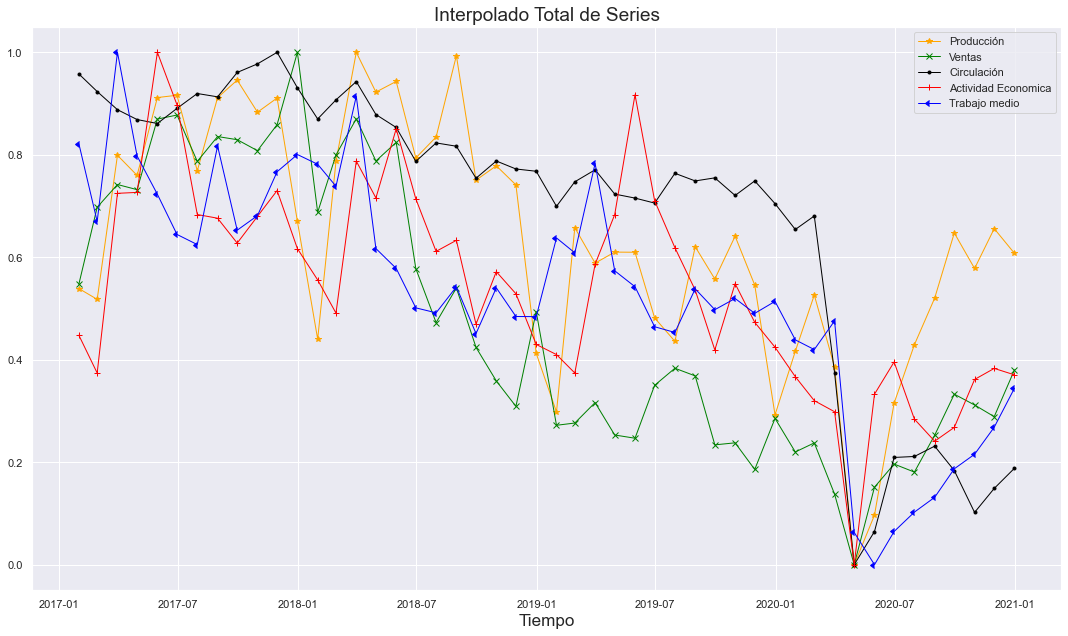

In [153]:
plt.figure(figsize=(15,9))
plt.plot(scaled_features_df.produc_total, marker='*', linestyle='-', linewidth=1, label='Producción', color='orange')
plt.plot(scaled_features_df.ventas_total, marker='x', linestyle='-', linewidth=1, label='Ventas', color='green')
plt.plot(scaled_features_df.cantidad_pasos, marker='.', linestyle='-', linewidth=1.01, label='Circulación', color='black')
plt.plot(scaled_features_df.EMAE_indice, marker='+', linestyle='-', linewidth=1, label='Actividad Economica', color='red')
plt.plot(scaled_features_df.work_mean, marker=8, linestyle='-', linewidth=1, label='Trabajo medio', color='blue')
plt.xlabel('Tiempo', size= 17)
plt.title('Interpolado Total de Series', size= 19)
plt.legend()
plt.tight_layout()
plt.show()

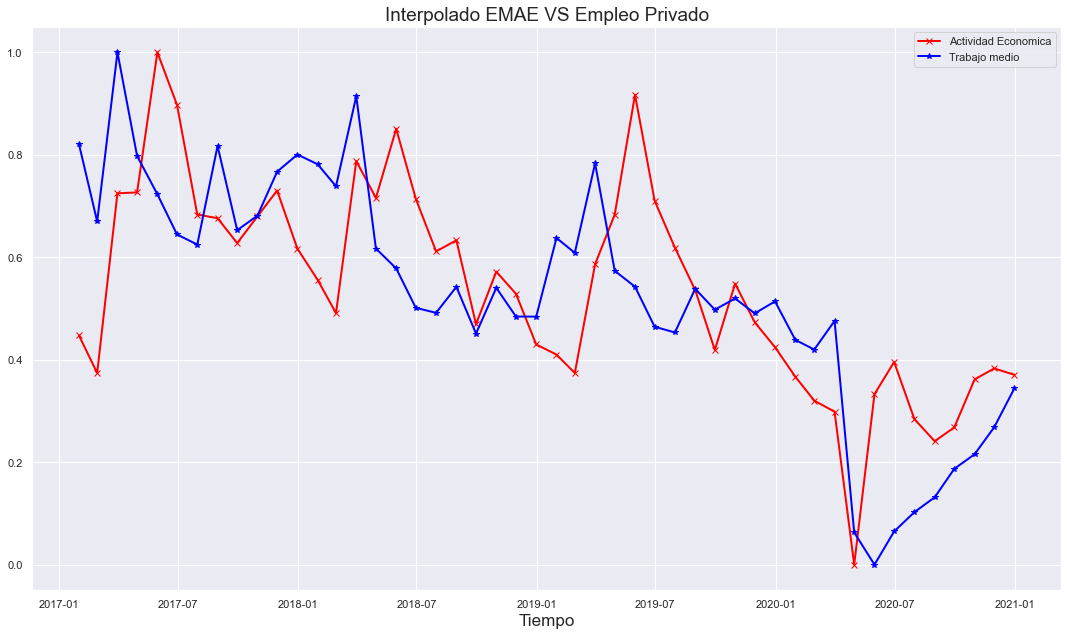

In [154]:
# Este tipo de escalado también nos permite comparar graficamente el nivel de actividad y media del 
# trabajo registrado.
plt.figure(figsize=(15,9))

plt.plot(scaled_features_df.EMAE_indice, marker='x', linestyle='-', linewidth=2, label='Actividad Economica', color='red')
plt.plot(scaled_features_df.work_mean, marker="*", linestyle='-', linewidth=2, label='Trabajo medio', color='blue')

plt.xlabel('Tiempo', size= 17)
plt.title('Interpolado EMAE VS Empleo Privado', size= 19)
plt.legend()
plt.tight_layout()
plt.show()

### **Modelado y pruebas**
Para la segunda parte del flujo de trabajo, vamos a utilizar de modelo Benchmark el SARIMAS del proyecto anterior con sus parametros por defecto (debido al alto costo computacional). La diferencia es que ahora le colocaremos una variable exogena para ver que tanto influye en la misma. 
Posteriormente implementaremos los modelos VAR y VARMAX atendiento a los requisitos que exigen los mismos.


#### Pruebas de causalidad, cointegración y estacionalidad
La base del VAR es que cada una de las series de tiempo se influyen entre sí. Es decir, puede predecir la serie con valores pasados de sí misma junto con otras series del dataset. Usando la prueba de causalidad de **Granger**, es posible probar esta relación antes incluso de construir los modelos.

In [155]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(dataset, variables = dataset.columns)    

,cantidad_pasos_x,work_mean_x,EMAE_indice_x,produc_total_x,ventas_total_x
cantidad_pasos_y,1.0000,0.0000,0.0000,0.0072,0.0026
work_mean_y,0.0000,1.0000,0.0000,0.0001,0.0000
EMAE_indice_y,0.0000,0.0000,1.0000,0.0000,0.0000
produc_total_y,0.0287,0.0127,0.3135,1.0000,0.0000
ventas_total_y,0.0605,0.0000,0.0002,0.1543,1.0000


**Prueba de Cointegración**
La prueba de cointegración o [Prueba de Johansen](https://www.statsmodels.org/stable/generated/statsmodels.tsa.vector_ar.vecm.coint_johansen.html), ayuda a establecer la presencia de una conexión estadísticamente significativa entre dos o más series de tiempo.

In [156]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(dataset)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
cantidad_pasos ::  139.32    > 60.0627   =>   True
work_mean ::  47.33     > 40.1749   =>   True
EMAE_indice ::  10.19     > 24.2761   =>   False
produc_total ::  3.24      > 12.3212   =>   False
ventas_total ::  0.01      > 4.1296    =>   False


Ahora solo nos falta ver si las series son estacionarias o no, y ver cuales seleccionamos para nuestros modelos. Para esta prueba utilizaremos el test de hipotesis [Dickey-Fuller](https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.adfuller.html) la cual nos dira si las series cumplen con los parametros de estacionalidad.

In [157]:
from statsmodels.tsa.stattools import adfuller

In [158]:
def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. T-valor : ",dftest[0])
     print("2. P-Valor : ", dftest[1])
     print("3. LAGS : ", dftest[2])
     print("4. Cantidad de valores observados utilizados para AIC Regression:",      dftest[3])
     print("5. Valores Criticos :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)

In [159]:
print("Cantidad de Pasos")
print(ad_test(dataset.cantidad_pasos))
print("--------------------------------")
print("Trabajo privado promedio")
print(ad_test(dataset.work_mean))
print("--------------------------------")
print("Nivel de Actividad")
print(ad_test(dataset.EMAE_indice))
print("--------------------------------")
print("Producción de vehiculos")
print(ad_test(dataset.produc_total))
print("--------------------------------")
print("Ventas totales")
print(ad_test(dataset.ventas_total))

Cantidad de Pasos
1. T-valor :  -0.031049103202282293
2. P-Valor :  0.9558877775303449
3. LAGS :  2
4. Cantidad de valores observados utilizados para AIC Regression: 45
5. Valores Criticos :
	 1% :  -3.584828853223594
	 5% :  -2.9282991495198907
	 10% :  -2.6023438271604937
None
--------------------------------
Trabajo privado promedio
1. T-valor :  -2.0431928057500928
2. P-Valor :  0.2679613763732015
3. LAGS :  0
4. Cantidad de valores observados utilizados para AIC Regression: 47
5. Valores Criticos :
	 1% :  -3.5778480370438146
	 5% :  -2.925338105429433
	 10% :  -2.6007735310095064
None
--------------------------------
Nivel de Actividad
1. T-valor :  -2.454427936476087
2. P-Valor :  0.12695976496445605
3. LAGS :  0
4. Cantidad de valores observados utilizados para AIC Regression: 47
5. Valores Criticos :
	 1% :  -3.5778480370438146
	 5% :  -2.925338105429433
	 10% :  -2.6007735310095064
None
--------------------------------
Producción de vehiculos
1. T-valor :  -0.3159474674322661

In [160]:
# Diferenciación #1
df_differenced = dataset.diff().dropna()
df_differenced

,cantidad_pasos,work_mean,EMAE_indice,produc_total,ventas_total
fecha,,,,,
2017-02-28,-1809.650922,-0.3413,-4.1,-1045.0,12433.0
2017-03-31,-1869.252304,0.7419,19.5,13958.0,3673.0
2017-04-30,-1013.854839,-0.4547,0.1,-1944.0,-830.0
2017-05-31,-408.016129,-0.1679,15.2,7542.0,11404.0
2017-06-30,1557.316129,-0.1763,-5.7,223.0,651.0
2017-07-31,1529.264516,-0.0444,-11.9,-7327.0,-7488.0
2017-08-31,-341.548387,0.4325,-0.4,7093.0,4016.0
2017-09-30,2507.717204,-0.3694,-2.7,1699.0,-508.0
2017-10-31,883.379570,0.0638,2.9,-3107.0,-1776.0


In [161]:
print(">>>SERIE DIFERENCIADA<<<")
print("Cantidad de Pasos")
print(ad_test(df_differenced.cantidad_pasos))
print("--------------------------------")
print("Trabajo privado promedio")
print(ad_test(df_differenced.work_mean))
print("--------------------------------")
print("Nivel de Actividad")
print(ad_test(df_differenced.EMAE_indice))
print("--------------------------------")
print("Producción de vehiculos")
print(ad_test(df_differenced.produc_total))
print("--------------------------------")
print("Ventas totales")
print(ad_test(df_differenced.ventas_total))

>>>SERIE DIFERENCIADA<<<
Cantidad de Pasos
1. T-valor :  -5.946392189320097
2. P-Valor :  2.1990731655039353e-07
3. LAGS :  1
4. Cantidad de valores observados utilizados para AIC Regression: 45
5. Valores Criticos :
	 1% :  -3.584828853223594
	 5% :  -2.9282991495198907
	 10% :  -2.6023438271604937
None
--------------------------------
Trabajo privado promedio
1. T-valor :  -9.33301371382101
2. P-Valor :  9.219836710067245e-16
3. LAGS :  0
4. Cantidad de valores observados utilizados para AIC Regression: 46
5. Valores Criticos :
	 1% :  -3.5812576580093696
	 5% :  -2.9267849124681518
	 10% :  -2.6015409829867675
None
--------------------------------
Nivel de Actividad
1. T-valor :  -3.96242197518265
2. P-Valor :  0.0016205805953336354
3. LAGS :  10
4. Cantidad de valores observados utilizados para AIC Regression: 36
5. Valores Criticos :
	 1% :  -3.626651907578875
	 5% :  -2.9459512825788754
	 10% :  -2.6116707716049383
None
--------------------------------
Producción de vehiculos
1. 

Hemos convertido todas las series en estacionarias solamente con una diferenciación lo que es muy positivo, ahora si ya estamos en condiciones de seguir con el proceso de modelado.

#### Train y Test
En este apartado previo al armado de modelos, es indispensable separar en TRAIN y TEST al conjunto de datos. Utilizaremos del dataset diferenciado las variables "cantidad_pasos" y "work_mean".
Los modelos se ajustaran al df_train y luego se utilizará para pronosticar los próximos 12 meses. Estos pronósticos se compararán con los datos reales presentes en los datos de prueba.
Si bien para el modelo VARMAX no es necesario utilizar tales diferencias, el modelo VAR sí precisa de esta diferenciación en train y test.

In [162]:
# Armamos una variable a parte llamada "senial" que nos permitirá desestacionalizar la serie.
senial = dataset[["cantidad_pasos","work_mean"]] # Este paso tambien nos permitira luego comparar el error en los modelos.
real_start,real_end = '2017-01-31','2019-12-31'
real_start1,real_end1 = '2019-12-31','2020-12-31'
df_train_real = senial[real_start:real_end]
df_test_real = senial[real_start1:real_end1]
print(df_train_real.shape)
print(df_test_real.shape)

dif = df_differenced[["cantidad_pasos","work_mean"]] # utilizamos la variable df_differenced ya creada con la serie estacionalizada.

# La consencuencia de diferenciar la serie es que perdemos el primer dato de la misma, por lo tanto cortamos la serie
# original sin el dato que se pierde con la diferenciación. 
limite_rmse = "2017-01-31" 
pred_rmse = senial[(senial.index > limite_rmse)]

tr_start,tr_end = '2017-01-31','2019-12-31'
te_start,te_end = '2019-12-31','2020-12-31'
df_train = dif[tr_start:tr_end]
df_test = dif[te_start:te_end]
print(df_train.shape)
print(df_test.shape)

(36, 2)
(13, 2)
(35, 2)
(13, 2)


In [163]:
df_train.head()

,cantidad_pasos,work_mean
fecha,,
2017-02-28,-1809.650922,-0.3413
2017-03-31,-1869.252304,0.7419
2017-04-30,-1013.854839,-0.4547
2017-05-31,-408.016129,-0.1679
2017-06-30,1557.316129,-0.1763


In [164]:
df_test.head()

,cantidad_pasos,work_mean
fecha,,
2019-12-31,-2335.494624,0.0525
2020-01-31,-2661.419355,-0.1688
2020-02-29,1389.684093,-0.0425
2020-03-31,-16121.167964,0.1258
2020-04-30,-19756.935484,-0.9279


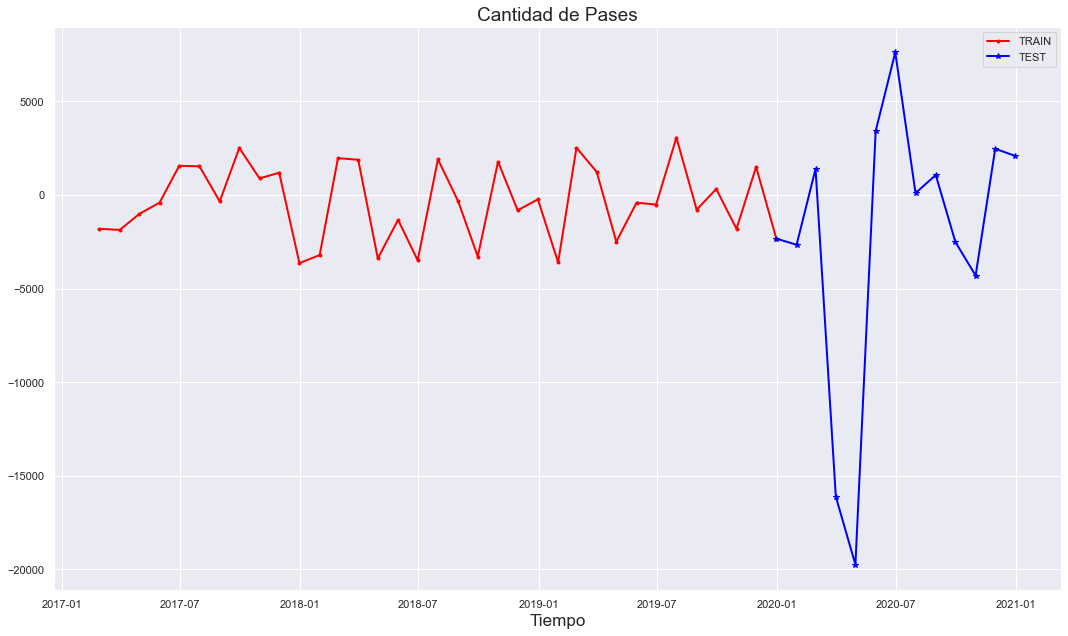

In [165]:
# Visualizamos la porcion del TRAIN y TEST que usara para el VAR.
plt.figure(figsize=(15,9))

plt.plot(df_train.cantidad_pasos, marker=".", linestyle='-', linewidth=2, label='TRAIN', color='red')
plt.plot(df_test.cantidad_pasos, marker="*", linestyle='-', linewidth=2, label='TEST', color='blue')

plt.xlabel('Tiempo', size= 17)
plt.title('Cantidad de Pases', size= 19)
plt.legend()
plt.tight_layout()
plt.show()

#### Benchmark
Usaremos el resampleo mensual de "cantidad_pasos" del 2017 hasta el 2020, y usaremos de variable exogena el promedio del empleo registrado en el sector privado.

Si bien ya estacionamos las series que utilizaremos, para este benchmark usaremos el SARIMAX añadiendole como variable exogena el empleo privado. El sarimax tiene un componente incorporado que estaciona por si sola la serie por lo que le pasaremos los datos "crudos" para ver que primer vistazo nos deja de los datos.

In [166]:
# Previamente necesitamos saber los componentes AR y MA para nuestro SARIMAX, por lo que utilizaremos
# las autocorrelación tradicional y la parcial.
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

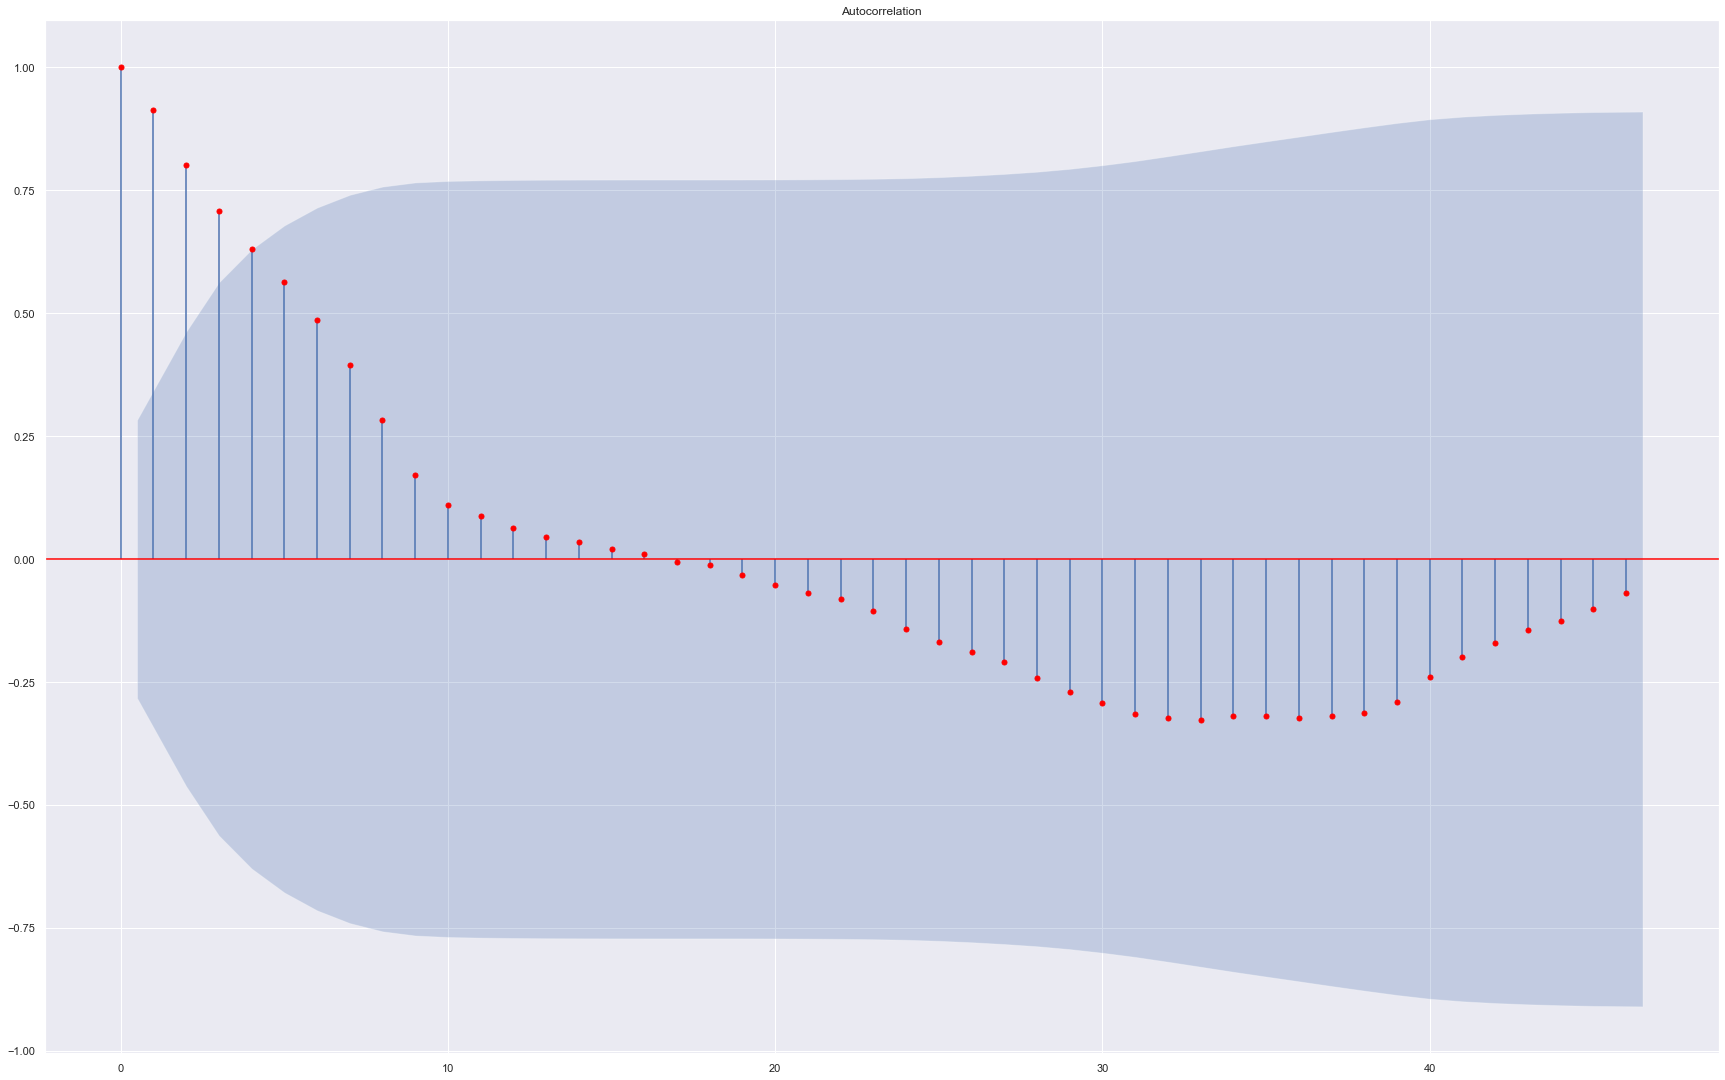

In [167]:
fig, ejes = plt.subplots(figsize=(30,19))
plot_acf(dataset.cantidad_pasos, lags = 46,ax=ejes,color="red",use_vlines=True)
    
plt.show()

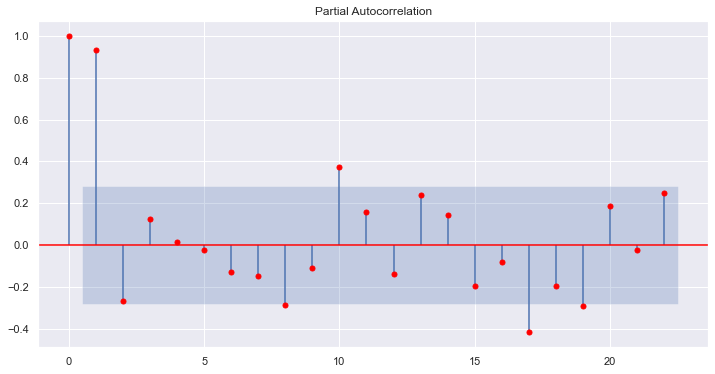

In [168]:
fig, ejes = plt.subplots(figsize=(12,6))
plot_pacf(dataset.cantidad_pasos,lags=22,ax=ejes,color="red")
plt.show()

In [169]:
# importamos de la librería Statsmodels el modelo SARIMAX, la metrica RMSE, y otras herramientas como
# itertools que nos permite iterar de manera eficaz sin utilizar tanto codigo y Warnings para evitar
# que aparezcan avisos indeseados que puedan afectar el rendimiento de la computadora.
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm
import itertools
from tqdm import tqdm_notebook
from sklearn.metrics import mean_squared_error
import warnings

In [170]:
exog = dataset.work_mean # le añadimos la variable exogena al modelo.
d = range(0,3) # definimos la cantidad de diferenciaciones que queremos que haga el modelo
p=q=range(2,5) # definimos el rango de valores correspondientes a AR y MA (ponemos 5 para que incluya el 4)
pdq=list(itertools.product (p,d,q))
seasonal_pdq=[(x[0],x[1],x[2],12)
              for x in list(itertools.product (p,d,q)) ]
print('Ejemplos de combinaciones de parametros para SARIMAX ....')
print('SARIMAX:{} x {}'.format(pdq[1],seasonal_pdq[1]))
print('SARIMAX:{} x {}'.format(pdq[1],seasonal_pdq[2]))
print('SARIMAX:{} x {}'.format(pdq[2],seasonal_pdq[3]))
print('SARIMAX:{} x {}'.format(pdq[2],seasonal_pdq[4]))

Ejemplos de combinaciones de parametros para SARIMAX ....
SARIMAX:(2, 0, 3) x (2, 0, 3, 12)
SARIMAX:(2, 0, 3) x (2, 0, 4, 12)
SARIMAX:(2, 0, 4) x (2, 1, 2, 12)
SARIMAX:(2, 0, 4) x (2, 1, 3, 12)


In [171]:
# Probamos la grilla buscando los mejores parametros
# warnings.filterwarnings("ignore")
# for param in pdq:
#     for param_seasonal in seasonal_pdq:
#         try:
#             mod=sm.tsa.statespace.SARIMAX (dataset.cantidad_pasos,
#                                            exog=exog,
#                                            order= param,
#                                            seasonal_order=param_seasonal,
#                                            enforce_stationarity=False,
#                                            enforce_invertibility=False)
#             results=mod.fit()
            
#             print('SARIMAX{}x{} - AIC:{}'.format(param,param_seasonal, results.aic))
            
#         except:
#             continue

In [172]:
# Entrenamos el modelo con la ultima combinación del ciclo For para el sarimax dado el menor AIC.
model = sm.tsa.statespace.SARIMAX(dataset.cantidad_pasos,
                                order=(2, 1, 2),
                                exog=exog,
                                seasonal_order=(2, 2, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

resultado = model.fit()

resultado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                     cantidad_pasos   No. Observations:                   48
Model:             SARIMAX(2, 1, 2)x(2, 2, 2, 12)   Log Likelihood                   0.000
Date:                            Sun, 21 Mar 2021   AIC                             20.000
Time:                                    19:09:31   BIC                                nan
Sample:                                01-31-2017   HQIC                               nan
                                     - 12-31-2020                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
work_mean   7569.2179         -0       -inf      0.000    7569.218    7569.218
ar.L1         -0.4922         -0        inf      0.000      -0.492      -0.492
ar.L2         -0.8655         -0        inf      0.000      -0.865      -0.865
ma.L1          0.4678         -0       -inf      0.000       0.468       0.468
ma.L2          0.8024         -0       -inf      0.000       0.802       0.802
ar.S.L12            0         -0        nan        nan           0           0
ar.S.L24            0         -0        nan        nan           0           0
ma.S.L12            0         -0        nan        nan           0           0
ma.S.L24            0         -0        nan        nan           0           0
sigma2      4.212e+07         -0       -inf      0.000    4.21e+07    4.21e+07
===================================================================================
Ljung-Box (L1) (Q):                    nan   Jarque-Bera (JB):                  nan
Prob(Q):                               nan   Prob(JB):                          nan
Heteroskedasticity (H):                nan   Skew:                              nan
Prob(H) (two-sided):                   nan   Kurtosis:                          nan
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

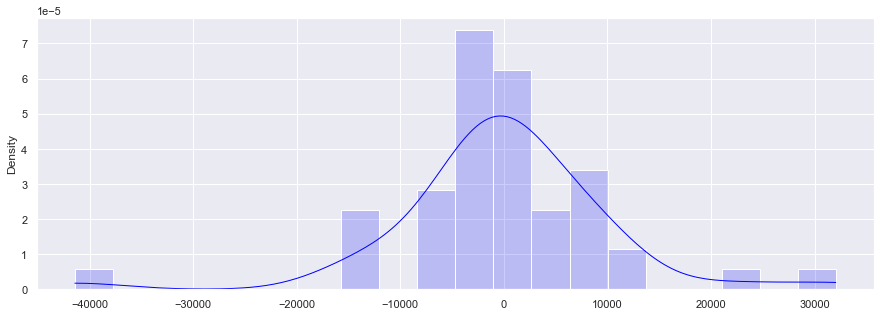

In [173]:
plt.figure(figsize=(15,5))
sns.histplot(data = resultado.resid, stat = "density",kde = True, line_kws= {"linewidth":1},color = "blue",alpha= 0.2)
plt.show()

##### Sarimax One-Step año 2020

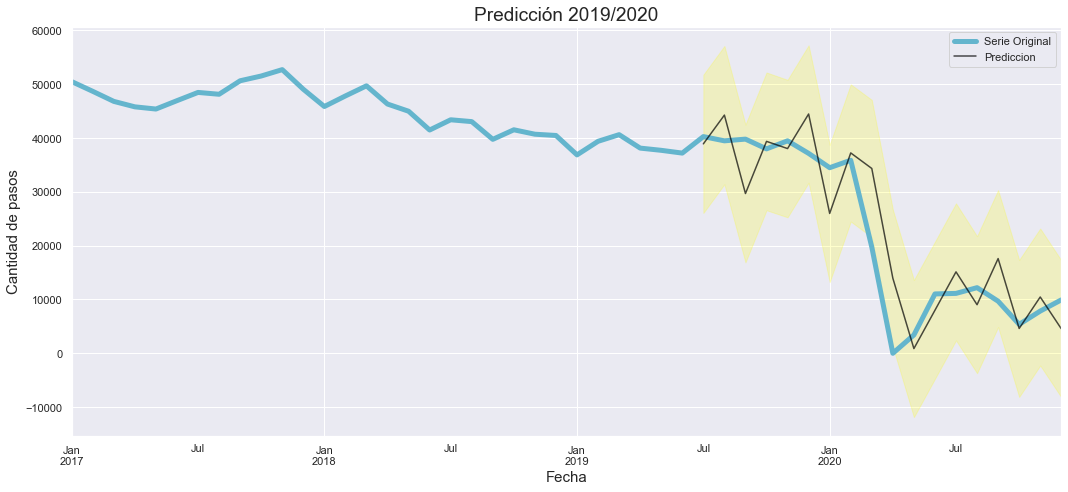

In [174]:
pred = resultado.get_prediction(start="2019-07-31", dynamic=False)
c_pred = pred.conf_int()
ax = dataset.cantidad_pasos['2017':].plot(label='Serie Original',color='c',lw = 5,figsize=(15,7))

pred.predicted_mean.plot(ax=ax, label='Prediccion', alpha=0.7, color='Black')

ax.fill_between(c_pred.index,
                c_pred.iloc[:, 0],
                c_pred.iloc[:, 1], color='yellow', alpha=0.2)

plt.title("Predicción 2019/2020", fontsize=19)
plt.xlabel('Fecha',size=15)
plt.ylabel('Cantidad de pasos', size=15)
plt.legend()
plt.tight_layout()
plt.show()

In [175]:
y_predf = pred.predicted_mean
y_real = dataset.cantidad_pasos['2019-07-31':]

error_one1 = np.sqrt(mean_squared_error(y_predf, y_real))
print('RMSE de One Step 2019-2020: ', error_one1)

RMSE de One Step 2019-2020:  6695.330900546609


Probamos la estrategia One-Step y no funciona mal, pero pareciera que al añadir la variable exogena al modelo, esta le genera mucho ruido a la serie original. Si lo vemos graficamente, hay cierta tendecia a que la predicción siga a la original, y hasta predice bastante bien la caida por el covid, sin embargo luego le cuesta seguir el ritmo de la serie original.

 ##### SARIMAX Multi-Step año 2019

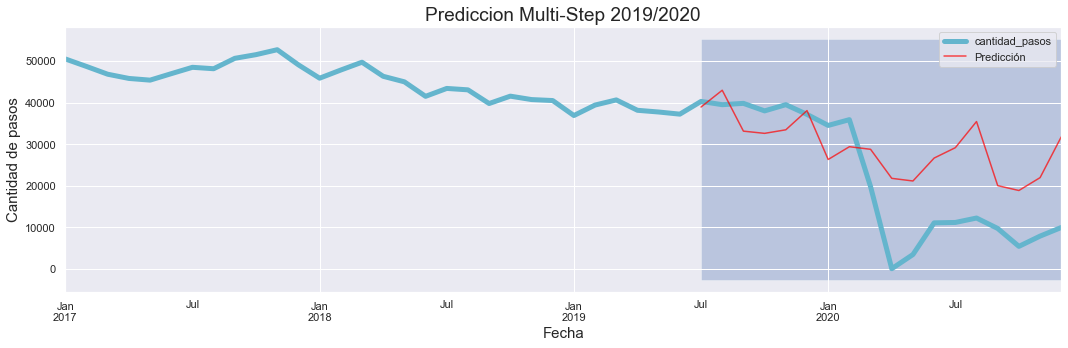

In [176]:
pred_m = resultado.get_prediction(start="2019-07-31", dynamic=True, full_results=True)
c_pred_m = pred_m.conf_int()

ax=dataset.cantidad_pasos['2017':].plot(color="c", lw=5, figsize=(15,5))
pred_m.predicted_mean.plot(ax= ax, label='Predicción', alpha=0.7, figsize=(15,5), color='red')

ax.fill_betweenx(ax.get_ylim(), datetime.datetime(2019,7,31), dataset.index[-1], alpha=0.3, zorder=-1)

plt.title('Prediccion Multi-Step 2019/2020', size= 19)
plt.xlabel('Fecha', size= 15)
plt.ylabel('Cantidad de pasos', size= 15)

plt.legend()
plt.tight_layout()
plt.show()

In [177]:
y_predf1 = pred_m.predicted_mean
y_real1 = dataset.cantidad_pasos['2019-07-31':]

error_mul = np.sqrt(mean_squared_error(y_predf1, y_real1))
print('RMSE para Multi-Step: ', error_mul)

RMSE para Multi-Step:  13271.616197763668


#### VAR
La caracteristica de este modelo, a diferencia de anteriores que hemos hecho, es que son mas manuales y no precisan de buscar diversos parametros (menos costos computacionales). Inicialmente importamos de la libreria Statsmodels el modelo VAR y luego elegimos el valor p (AR) que mejor se ajuste a nuestros datos  seleccionando el orden (p) del VAR en función de la mejor puntuación AIC.

In [178]:
# Comenzamos buscando el menor AIC de nuestro set de datos diferenciado.
from statsmodels.tsa.api import VAR
forecasting_model = VAR(df_train)
results_aic = []
for p in range(1,14):
    try:
        results = forecasting_model.fit(p)
        results_aic.append(results.aic)
    except:
        continue

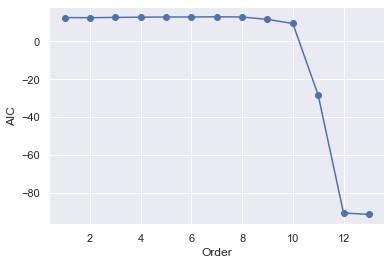

In [179]:
plt.plot(list(np.arange(1,14,1)), results_aic,marker="o")
plt.xlabel("Order")
plt.ylabel("AIC")
plt.show()

In [180]:
# entrenamos el modelo con el numero de lag correspondiente.
model_fitted = forecasting_model.fit(13)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 21, Mar, 2021
Time:                     19:09:35
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -88.7588
Nobs:                     22.0000    HQIC:                  -90.8060
Log likelihood:           997.372    FPE:                1.38020e-40
AIC:                     -91.4368    Det(Omega_mle):     2.78225e-41
--------------------------------------------------------------------
Results for equation cantidad_pasos
                        coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------
const                   -555.320907         0.072039        -7708.605           0.000
L1.cantidad_pasos         -0.651213              NAN              NAN             NAN
L1.work_mean           -1400.52

In [181]:
# tomamos los 13 pasos finales en los datos de entrenamiento para pronosticar el próximo paso 
# inmediato (es decir, los primeros días de los datos de prueba).
df_train.values[-13:]

array([[-2.34693548e+02, -6.00000000e-04],
       [-3.60709677e+03,  3.45200000e-01],
       [ 2.52421889e+03, -6.54000000e-02],
       [ 1.23394240e+03,  3.92300000e-01],
       [-2.49903763e+03, -4.71000000e-01],
       [-4.12188172e+02, -6.99000000e-02],
       [-5.14645161e+02, -1.75500000e-01],
       [ 3.06451613e+03, -2.52000000e-02],
       [-7.84967742e+02,  1.91400000e-01],
       [ 3.16484946e+02, -9.14000000e-02],
       [-1.81142043e+03,  4.91000000e-02],
       [ 1.49672043e+03, -6.52000000e-02],
       [-2.33549462e+03,  5.25000000e-02]])

In [182]:
laaged_values = df_train.values[-13:]
forecast = pd.DataFrame(results.forecast(y= laaged_values, steps=13), 
                        index = df_test.index, columns= ['dif_cantidad_pasos', 'dif_work_mean'])
forecast

,dif_cantidad_pasos,dif_work_mean
fecha,,
2019-12-31,2989.803778,0.496766
2020-01-31,-2987.449329,0.081283
2020-02-29,3346.862221,0.299145
2020-03-31,-7344.023852,-0.276484
2020-04-30,2108.933901,-0.270856
2020-05-31,-2637.099219,-0.019400
2020-06-30,4024.199971,-0.184050
2020-07-31,-282.654748,0.291744
2020-08-31,-2205.813393,-0.409937


In [183]:
forecast["cantidad_pasos_predicho"] = senial["cantidad_pasos"].iloc[-12-1] + forecast['dif_cantidad_pasos'].cumsum()
forecast["work_mean_predicho"] = senial["work_mean"].iloc[-12-1] + forecast['dif_work_mean'].cumsum() 
forecast

,dif_cantidad_pasos,dif_work_mean,cantidad_pasos_predicho,work_mean_predicho
fecha,,,,
2019-12-31,2989.803778,0.496766,40139.642487,2.240166
2020-01-31,-2987.449329,0.081283,37152.193158,2.321449
2020-02-29,3346.862221,0.299145,40499.055379,2.620594
2020-03-31,-7344.023852,-0.276484,33155.031527,2.344110
2020-04-30,2108.933901,-0.270856,35263.965428,2.073254
2020-05-31,-2637.099219,-0.019400,32626.866210,2.053855
2020-06-30,4024.199971,-0.184050,36651.066181,1.869805
2020-07-31,-282.654748,0.291744,36368.411433,2.161549
2020-08-31,-2205.813393,-0.409937,34162.598040,1.751612


##### Visualizaciones

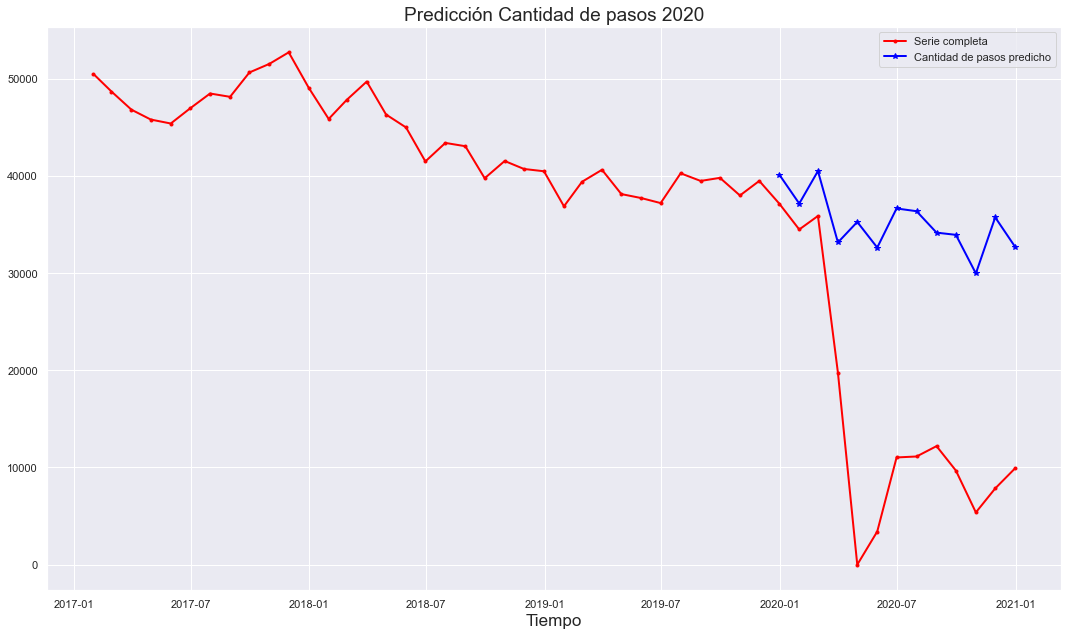

In [184]:
plt.figure(figsize=(15,9))

plt.plot(dataset.index, dataset.cantidad_pasos, marker=".", linestyle='-', linewidth=2, label='Serie completa', color='red')
plt.plot(forecast.index,forecast.cantidad_pasos_predicho, marker="*", linestyle='-', linewidth=2, label='Cantidad de pasos predicho', color='blue')

plt.xlabel('Tiempo', size= 17)
plt.title('Predicción Cantidad de pasos 2020', size= 19)
plt.legend()
plt.tight_layout()
plt.show()

In [185]:
y_predf_ = forecast.cantidad_pasos_predicho
y_real_ = df_test_real.cantidad_pasos

error_var_pases = np.sqrt(mean_squared_error(y_predf_, y_real_))
print('RMSE VAR Cantidad de Pases: ', error_var_pases)

RMSE VAR Cantidad de Pases:  22495.28833188811


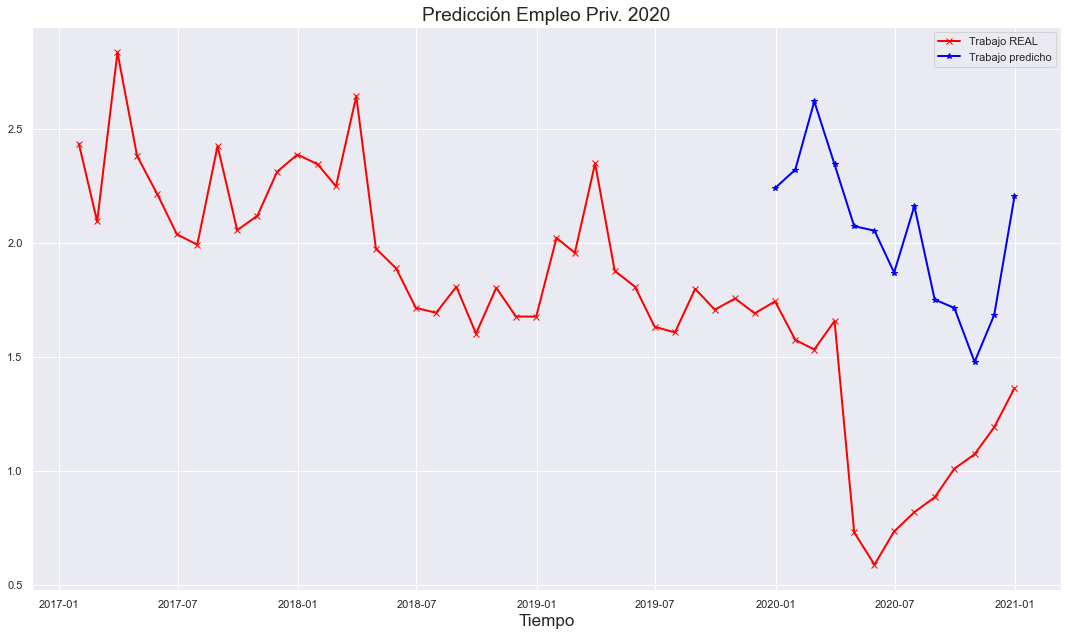

In [186]:
plt.figure(figsize=(15,9))

plt.plot(dataset.index, dataset.work_mean, marker='x', linestyle='-', linewidth=2, label='Trabajo REAL', color='red')
plt.plot(forecast.index,forecast.work_mean_predicho, marker="*", linestyle='-', linewidth=2, label='Trabajo predicho', color='blue')

plt.xlabel('Tiempo', size= 17)
plt.title('Predicción Empleo Priv. 2020', size= 19)
plt.legend()
plt.tight_layout()
plt.show()

In [187]:
y_predf_1 = forecast.work_mean_predicho
y_real_1 = df_test_real.work_mean

error_var_work = np.sqrt(mean_squared_error(y_predf_1, y_real_1))
print('RMSE Trabajo priv. Promedio: ', error_var_work)

RMSE Trabajo priv. Promedio:  0.9555262318320799


#### VARMAX
En este aparto final, la estrategia será comparar el mismo modelo pero con series de datos distintas:
- La primera será utilizar los datos crudos sin estacionalizar para observar que tanto error pueden arrojar nuestras variables;
- En segundo lugar, entrenamos un modelo con los datos corregidos para hacerlo estacionario. El objetivo es comparar el modelo con los parametros correctos VS los no estacionarios a modo de ser una suerte de Benchmark del modelo VARMAX ya que es nueva su implementación;
- Finalmente, en tercer lugar le agregamos una variable exogena al modelo con el objetivo de comparar al segundo para notar si le agrega mas información a la series que queremos predecir.

Queremos destacar la versatilidad del modelo VARMAX, ya que depende de los parametros que le coloquemos, el mismo puede funcionar como un modelo VAR (Vectores autorregresivos) si le ponemos el valor (p) unicamente, VMA(Vectores de media movil) si le ponemos el valor (q) unicamente; y VARMA (Vectores autorregresivos con media movil) si le ponemos los valores (p,q) unicamente. En este caso, de forma similiar al SARIMAX, el VARMAX le agrega (si asi lo deseamos) una factor exogeno agregando mas información al modelo de aquellos fenomenos que no pueda explicar (como catastrofes, crisis economicas o cualquier suceso estocastico).

In [188]:
# de la libreria Statsmodels, importamos nuestro modelo
from statsmodels.tsa.statespace.varmax import VARMAX

In [189]:
p=q=range(1,13) # definimos el rango de valores correspondientes a AR y MA (ponemos 13 para que incluya el 12)  
pq=list(itertools.product (p,q))

In [190]:
# Buscamos la mejor conbinacion de parametros que se ajusten a nuestro modelo.
warnings.filterwarnings("ignore")
for order in pq:
    try: 
        varmax =VARMAX(senial,order = order)                                    
        res=varmax.fit()
        print("VARMAX: ", order)
        print("AIC: ", res.aic)
    except:
            continue

VARMAX:  (1, 1)
AIC:  944.575687026607
VARMAX:  (1, 2)
AIC:  947.6262447895882
VARMAX:  (1, 3)
AIC:  952.5032858018516
VARMAX:  (1, 4)
AIC:  954.6494017157097
VARMAX:  (1, 5)
AIC:  964.6080150640083
VARMAX:  (1, 6)
AIC:  966.8170601456035
VARMAX:  (1, 7)
AIC:  1033.1945207128585
VARMAX:  (1, 8)
AIC:  974.3163118824489
VARMAX:  (1, 9)
AIC:  974.3348287374486
VARMAX:  (1, 10)
AIC:  1031.1136721962596
VARMAX:  (1, 11)
AIC:  1039.1136721962596
VARMAX:  (1, 12)
AIC:  1047.1136721962596
VARMAX:  (2, 1)
AIC:  946.6901382833864
VARMAX:  (2, 2)
AIC:  947.7654092579285
VARMAX:  (2, 3)
AIC:  958.3601624920559
VARMAX:  (2, 4)
AIC:  961.6342059038548
VARMAX:  (2, 5)
AIC:  967.7748863817151
VARMAX:  (2, 6)
AIC:  969.6779294486088
VARMAX:  (2, 8)
AIC:  970.9146146943867
VARMAX:  (2, 9)
AIC:  978.1775351827778
VARMAX:  (3, 1)
AIC:  948.9758387931363
VARMAX:  (3, 2)
AIC:  955.8592249007365
VARMAX:  (3, 3)
AIC:  965.6438372665896
VARMAX:  (3, 4)
AIC:  965.8166341395512
VARMAX:  (3, 5)
AIC:  980.22108941

In [191]:
# Entrenamos y predecimos
varmax_mod = VARMAX(senial, order=(1,1)).fit()
result_mod = varmax_mod.predict()
varmax_mod.summary()

Dep. Variable:,"['cantidad_pasos', 'work_mean']",No. Observations:,48
Model:,"VARMA(1,1)",Log Likelihood,-459.288
,+ intercept,AIC,944.576
Date:,"Sun, 21 Mar 2021",BIC,968.901
Time:,19:22:28,HQIC,953.768
Sample:,01-31-2017,,
,- 12-31-2020,,
Covariance Type:,opg,,
Ljung-Box (L1) (Q):,"0.30, 0.09",Jarque-Bera (JB):,"90.83, 10.33"
Prob(Q):,"0.59, 0.77",Prob(JB):,"0.00, 0.01"
Heteroskedasticity (H):,"7.84, 0.26",Skew:,"-1.67, 0.94"


##### Graficas y Error

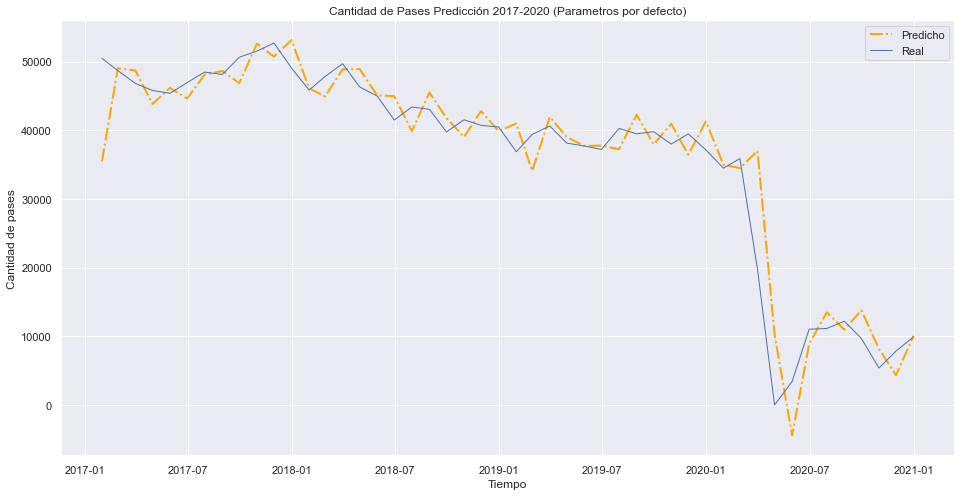

In [192]:
# Graficamos
plt.figure(figsize=(16,8))
plt.plot(result_mod.cantidad_pasos,label="Predicho",ls='-.',lw =2,color="orange")
plt.plot(senial.cantidad_pasos,label="Real",ls="solid",lw=1)

plt.title("Cantidad de Pases Predicción 2017-2020 (Parametros por defecto)")
plt.xlabel("Tiempo")
plt.ylabel("Cantidad de pases")
plt.legend()
plt.show()

In [193]:
y_predf_varmax = result_mod.cantidad_pasos
y_real_varmax = senial.cantidad_pasos

error_varmax_pases = np.sqrt(mean_squared_error(y_predf_varmax, y_real_varmax))
print('RMSE Trabajo priv. Promedio: ', error_varmax_pases)

RMSE Trabajo priv. Promedio:  4462.208763309949


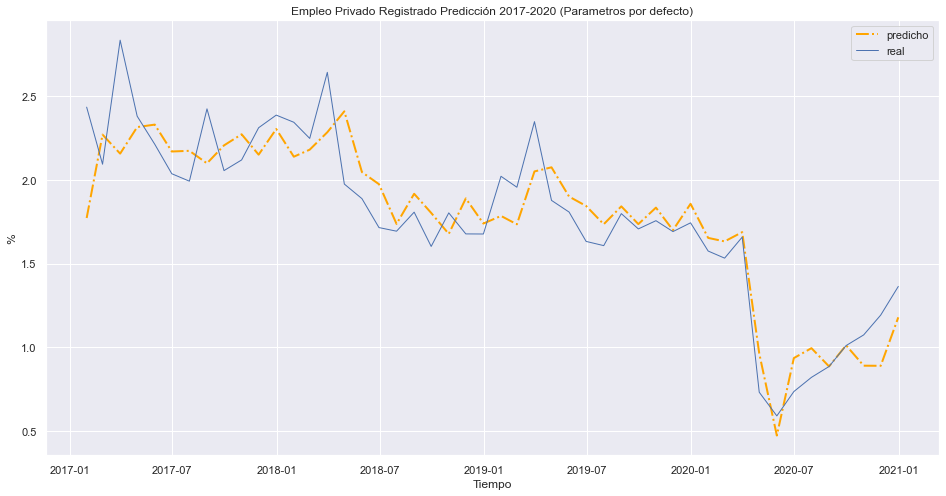

In [194]:
plt.figure(figsize=(16,8))
plt.plot(result_mod.work_mean,label="predicho",ls='-.',lw =2,color="orange")
plt.plot(senial.work_mean,label="real",lw=1)

plt.title("Empleo Privado Registrado Predicción 2017-2020 (Parametros por defecto)")
plt.xlabel("Tiempo")
plt.ylabel("%")
plt.legend()
plt.show()

In [195]:
y_predf_varmax_work = result_mod.work_mean
y_real_varmax_work = senial.work_mean

error_varmax_work = np.sqrt(mean_squared_error(y_predf_varmax_work, y_real_varmax_work))
print('RMSE Trabajo priv. Promedio: ', error_varmax_work)

RMSE Trabajo priv. Promedio:  0.2236999979056472


##### VARMAX Sin variable Exogena
Aquí seguimos analizando el modelo pero ahora optimizado mediante una grilla FOR que ya habiamos definido previamente.

In [196]:
# corremos la grilla buscando la mejor combinación de p y q que nos de el menor AIC.
# warnings.filterwarnings("ignore")
# for order in pq:
#     try: 
#         varmax =VARMAX(dif,order = order)                                    
#         res=varmax.fit()
#         print("VARMAX: ", order)
#         print("AIC: ", res.aic)
#     except:
#             continue

VARMAX:  (1, 1)
AIC:  923.6917120034853
VARMAX:  (1, 2)
AIC:  930.2059852500682
VARMAX:  (1, 3)
AIC:  932.9521326451667
VARMAX:  (1, 4)
AIC:  941.372078859852
VARMAX:  (1, 5)
AIC:  940.6026776922733
VARMAX:  (1, 6)
AIC:  943.4440999429044
VARMAX:  (1, 7)
AIC:  3582.428904399697
VARMAX:  (1, 8)
AIC:  942.3905230932876
VARMAX:  (1, 10)
AIC:  955.8430131727711
VARMAX:  (2, 1)
AIC:  928.4973590951668
VARMAX:  (2, 2)
AIC:  938.2855592219851
VARMAX:  (2, 3)
AIC:  937.7367314505102
VARMAX:  (2, 4)
AIC:  947.1232589322468
VARMAX:  (2, 5)
AIC:  941.0523002402059
VARMAX:  (2, 6)
AIC:  956.6309065059671
VARMAX:  (2, 8)
AIC:  948.4828097482995
VARMAX:  (2, 9)
AIC:  982.6906718394729
VARMAX:  (3, 1)
AIC:  934.9381208417275
VARMAX:  (3, 2)
AIC:  943.58040574342
VARMAX:  (3, 3)
AIC:  952.0442723805896
VARMAX:  (3, 4)
AIC:  954.2632742309736
VARMAX:  (3, 5)
AIC:  957.3254614996279
VARMAX:  (3, 6)
AIC:  969.9863423097412
VARMAX:  (3, 8)
AIC:  958.3710948482666
VARMAX:  (3, 9)
AIC:  955.0654548409186
VA

In [197]:
# entrenamos y predecimos 
varmax_mod = VARMAX(dif, order=(1,1)).fit()
varmax_mod.predict()
varmax_mod.summary()

Dep. Variable:,"['cantidad_pasos', 'work_mean']",No. Observations:,47
Model:,"VARMA(1,1)",Log Likelihood,-448.846
,+ intercept,AIC,923.692
Date:,"Sun, 21 Mar 2021",BIC,947.744
Time:,19:36:30,HQIC,932.743
Sample:,02-28-2017,,
,- 12-31-2020,,
Covariance Type:,opg,,
Ljung-Box (L1) (Q):,"0.05, 0.11",Jarque-Bera (JB):,"63.49, 2.34"
Prob(Q):,"0.82, 0.74",Prob(JB):,"0.00, 0.31"
Heteroskedasticity (H):,"6.42, 0.23",Skew:,"-1.64, 0.48"


In [198]:
# Transformamos la serie diferenciada a la original.
transform = pd.DataFrame(varmax_mod.predict(),index = dif.index, columns= ['cantidad_pasos', 'work_mean'])
transform["cantidad_pasos_predicho"] = senial["cantidad_pasos"].iloc[-47] + transform['cantidad_pasos'].cumsum()
transform["work_mean_predicho"] = senial["work_mean"].iloc[-47] + transform['work_mean'].cumsum()
transform.head()

,cantidad_pasos,work_mean,cantidad_pasos_predicho,work_mean_predicho
fecha,,,,
2017-02-28,-537.463426,-0.015079,48145.143717,2.078921
2017-03-31,208.216909,0.090803,48353.360626,2.169724
2017-04-30,-2788.883908,-0.391630,45564.476717,1.778094
2017-05-31,1756.153154,0.087666,47320.629871,1.865761
2017-06-30,-2045.161454,-0.028370,45275.468417,1.837390


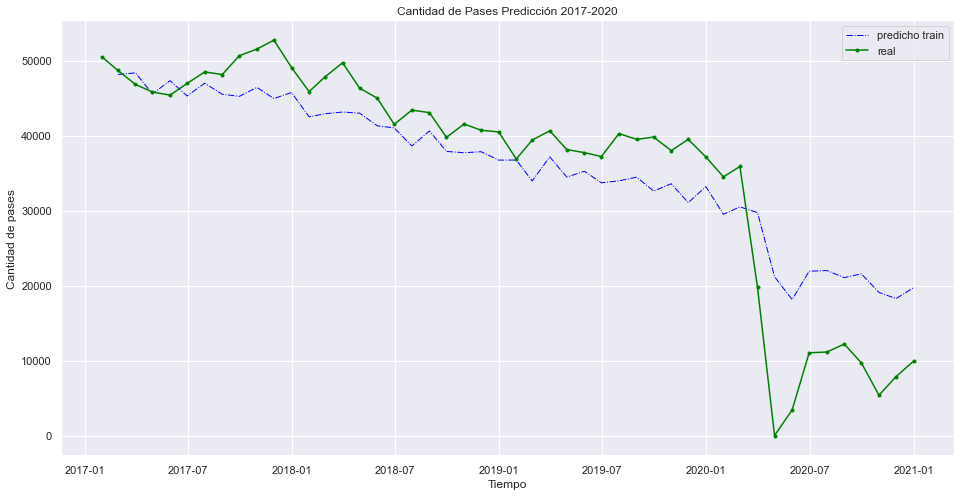

In [199]:
plt.figure(figsize=(16,8))
plt.plot(transform.cantidad_pasos_predicho,label="predicho train",ls="-.",lw=1,color="blue")
plt.plot(senial.cantidad_pasos,label="real",marker=".",ls="solid",color="green")


plt.title("Cantidad de Pases Predicción 2017-2020")
plt.xlabel("Tiempo")
plt.ylabel("Cantidad de pases")
plt.legend()
plt.show()

In [200]:
y_pred = transform.cantidad_pasos_predicho
y_real = pred_rmse.cantidad_pasos
error_pases = np.sqrt(mean_squared_error(y_pred, y_real))
print('RMSE Cantidad Pases VARMAX: ', error_pases)

RMSE Cantidad Pases VARMAX:  6967.807373483221


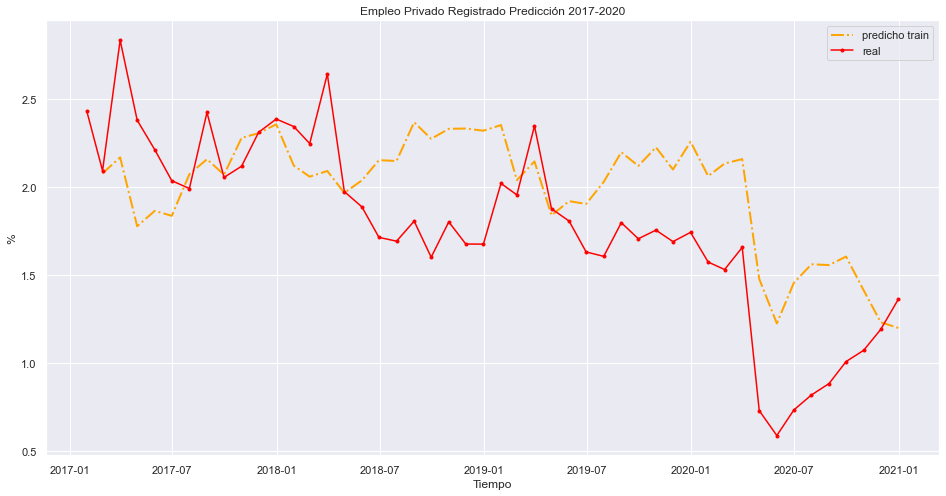

In [201]:
plt.figure(figsize=(16,8))
plt.plot(transform.work_mean_predicho,label="predicho train",ls='-.',lw =2,color="orange")
plt.plot(senial.work_mean,label="real",marker=".",color="red")

plt.title("Empleo Privado Registrado Predicción 2017-2020")
plt.xlabel("Tiempo")
plt.ylabel("%")
plt.legend()
plt.show()

In [202]:
y_pred_work = transform.work_mean_predicho
y_real_work = pred_rmse.work_mean
error_work = np.sqrt(mean_squared_error(y_pred_work, y_real_work))
print('RMSE Trabajo Promedio VARMAX: ', error_work)

RMSE Trabajo Promedio VARMAX:  0.438656295098635


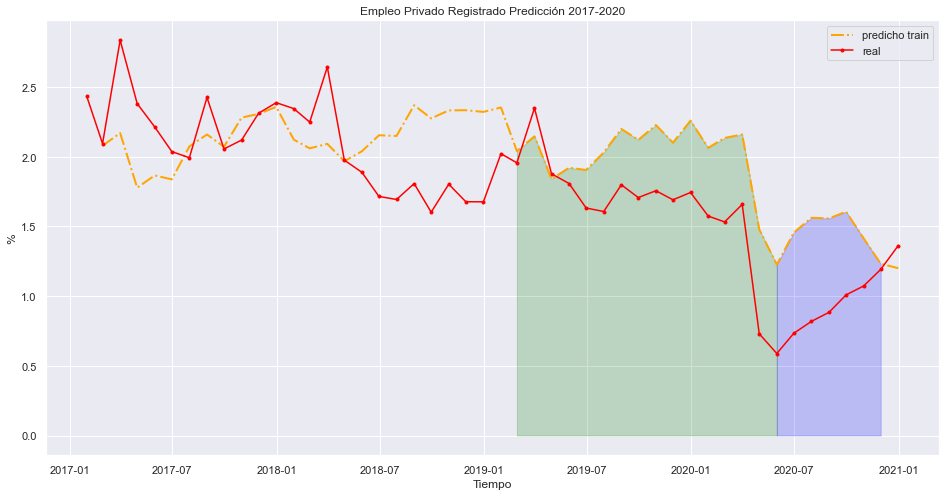

In [203]:
plt.figure(figsize=(16,8))
plt.plot(transform.work_mean_predicho,label="predicho train",ls='-.',lw =2,color="orange")
plt.plot(senial.work_mean,label="real",marker=".",color="red")

cond_1 = (transform.index>"2019-01-31") & (transform.index<"2020-06-30")
cond_2 = (transform.index>"2020-04-30") & (transform.index<"2020-12-31")

plt.title("Empleo Privado Registrado Predicción 2017-2020")
plt.xlabel("Tiempo")
plt.ylabel("%")
plt.fill_between(transform.index,transform.work_mean_predicho,where=cond_1,alpha=0.2,color='green')
plt.fill_between(transform.index,transform.work_mean_predicho,where=cond_2,alpha=0.2,color='blue')

plt.legend()
plt.show()

##### VARMAX Con variable Exogena
Como variable exogena utilizaremos el nivel de actividad economica, se espera que este tipo de variable impulse un poco mas tanto la cantidad de pases como el empleo registrado. Como sabemos, tenemos que estacionalizarla para colocarla en el modelo, por lo tanto procederemos a hacerlo. Luego, el ciclo de entrenamiento y prediccion es el mismo que veniamos haciendo.

In [204]:
# Diferenciamos la variable exogena.
actividad_dif = dataset.EMAE_indice.diff().dropna()
actividad_dif.head()

fecha
2017-02-28    -4.1
2017-03-31    19.5
2017-04-30     0.1
2017-05-31    15.2
2017-06-30    -5.7
Name: EMAE_indice, dtype: float64

In [205]:
# warnings.filterwarnings("ignore")
# for order in pq:
#     try: 
#         varmax =VARMAX(dif,exog=actividad_dif,order = order)                                    
#         res=varmax.fit()
#         print("VARMAX: ", order)
#         print("AIC: ", res.aic)
#     except:
#             continue

VARMAX:  (1, 1)
AIC:  915.6408240205448
VARMAX:  (1, 2)
AIC:  916.9744095551123
VARMAX:  (1, 3)
AIC:  931.0231634057786
VARMAX:  (1, 4)
AIC:  930.8656312134101
VARMAX:  (1, 5)
AIC:  938.2148234270683
VARMAX:  (1, 6)
AIC:  941.6949947148964
VARMAX:  (1, 7)
AIC:  9653.336278489682
VARMAX:  (1, 8)
AIC:  946.3342766307293
VARMAX:  (1, 9)
AIC:  957.6693412296711
VARMAX:  (1, 10)
AIC:  1008.5400976784372
VARMAX:  (1, 11)
AIC:  1016.5400976784372
VARMAX:  (2, 1)
AIC:  924.5980409972482
VARMAX:  (2, 2)
AIC:  930.3008093636087
VARMAX:  (2, 3)
AIC:  936.9957194197845
VARMAX:  (2, 4)
AIC:  937.6146395566955
VARMAX:  (2, 5)
AIC:  943.4563568410026
VARMAX:  (2, 6)
AIC:  950.4239973216236
VARMAX:  (2, 7)
AIC:  17722583.62444978
VARMAX:  (2, 8)
AIC:  950.0311162509399
VARMAX:  (3, 1)
AIC:  936.0960003999237
VARMAX:  (3, 2)
AIC:  939.5404654642242
VARMAX:  (3, 3)
AIC:  939.2207736191199
VARMAX:  (3, 4)
AIC:  939.6705122427783
VARMAX:  (3, 5)
AIC:  953.8810226271314
VARMAX:  (3, 6)
AIC:  956.0880883910

In [206]:
varmax_exog = VARMAX(dif,exog=actividad_dif, order=(1,1)).fit()
varmax_exog.predict()
varmax_exog.summary()

Dep. Variable:,"['cantidad_pasos', 'work_mean']",No. Observations:,47
Model:,"VARMAX(1,1)",Log Likelihood,-442.820
,+ intercept,AIC,915.641
Date:,"Sun, 21 Mar 2021",BIC,943.393
Time:,19:53:53,HQIC,926.084
Sample:,02-28-2017,,
,- 12-31-2020,,
Covariance Type:,opg,,
Ljung-Box (L1) (Q):,"2.00, 0.24",Jarque-Bera (JB):,"80.79, 22.20"
Prob(Q):,"0.16, 0.62",Prob(JB):,"0.00, 0.00"
Heteroskedasticity (H):,"6.62, 0.37",Skew:,"-1.82, 1.02"


In [207]:
exog_act = pd.DataFrame(varmax_exog.predict(),index = dif.index, columns= ['cantidad_pasos', 'work_mean'])
exog_act["cantidad_pasos_predicho"] = senial["cantidad_pasos"].iloc[-47] + exog_act['cantidad_pasos'].cumsum()
exog_act["work_mean_predicho"] = senial["work_mean"].iloc[-47] + exog_act['work_mean'].cumsum()
exog_act.head()

,cantidad_pasos,work_mean,cantidad_pasos_predicho,work_mean_predicho
fecha,,,,
2017-02-28,2148.159243,0.042220,50830.766386,2.136220
2017-03-31,871.649308,-0.031353,51702.415694,2.104867
2017-04-30,1085.710041,-0.365192,52788.125735,1.739675
2017-05-31,490.650816,-0.031380,53278.776550,1.708295
2017-06-30,-2208.486683,-0.232931,51070.289867,1.475365


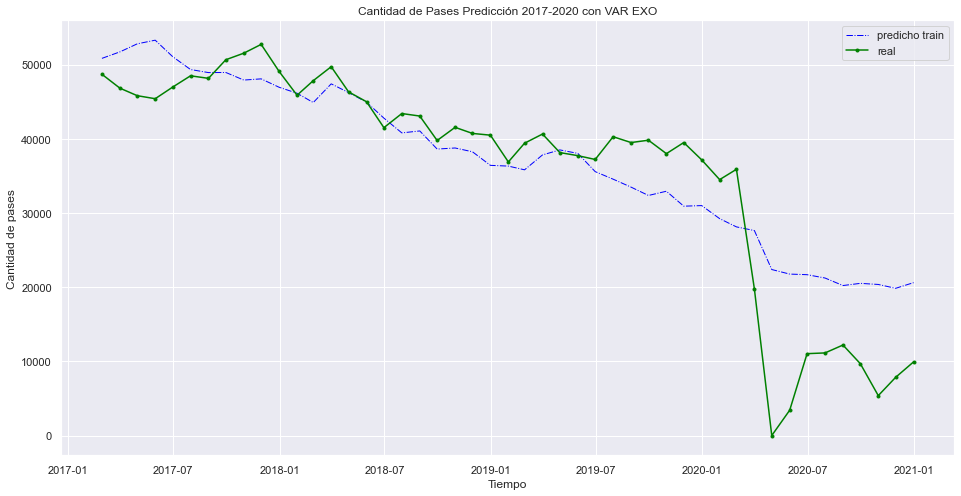

In [208]:
plt.figure(figsize=(16,8))
plt.plot(exog_act.cantidad_pasos_predicho,label="predicho train",ls="-.",lw=1,color="blue")
plt.plot(pred_rmse.cantidad_pasos,label="real",marker=".",ls="solid",color="green")


plt.title("Cantidad de Pases Predicción 2017-2020 con VAR EXO")
plt.xlabel("Tiempo")
plt.ylabel("Cantidad de pases")
plt.legend()
plt.show()

In [209]:
y_pred_exo_pases = exog_act.cantidad_pasos_predicho
y_real_exo_pases = pred_rmse.cantidad_pasos
error_exo_pases = np.sqrt(mean_squared_error(y_pred_exo_pases, y_real_exo_pases))
print('RMSE Cantidad Pases VARMAX: ', error_exo_pases)

RMSE Cantidad Pases VARMAX:  7160.3812561156865


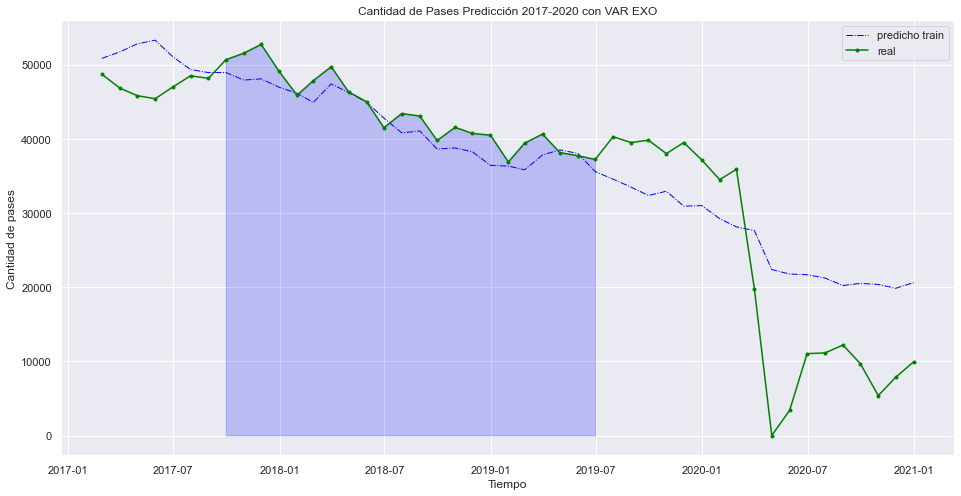

In [210]:
plt.figure(figsize=(16,8))
plt.plot(exog_act.cantidad_pasos_predicho,label="predicho train",ls="-.",lw=1,color="blue")
plt.plot(pred_rmse.cantidad_pasos,label="real",marker=".",ls="solid",color="green")

cond_ = (pred_rmse.index>"2017-08-31") & (pred_rmse.index<"2019-07-31")

plt.title("Cantidad de Pases Predicción 2017-2020 con VAR EXO")
plt.xlabel("Tiempo")
plt.ylabel("Cantidad de pases")
plt.fill_between(pred_rmse.index,pred_rmse.cantidad_pasos,where=cond_,alpha=0.2,color='blue')
plt.legend()
plt.show()

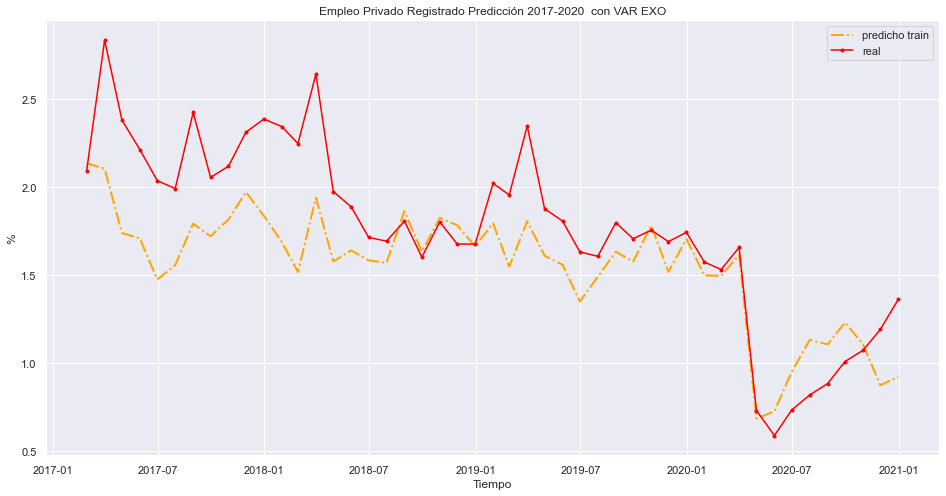

In [211]:
plt.figure(figsize=(16,8))
plt.plot(exog_act.work_mean_predicho,label="predicho train",ls='-.',lw =2,color="orange")
plt.plot(pred_rmse.work_mean,label="real",marker=".",color="red")


plt.title("Empleo Privado Registrado Predicción 2017-2020  con VAR EXO")
plt.xlabel("Tiempo")
plt.ylabel("%")
plt.legend()
plt.show()

In [212]:
y_pred_exo_work = exog_act.work_mean_predicho
y_real_exo_work = pred_rmse.work_mean
error_exo_work = np.sqrt(mean_squared_error(y_pred_exo_work, y_real_exo_work))
print('RMSE Trabajo Promedio VARMAX: ', error_exo_work)

RMSE Trabajo Promedio VARMAX:  0.3524178522440794


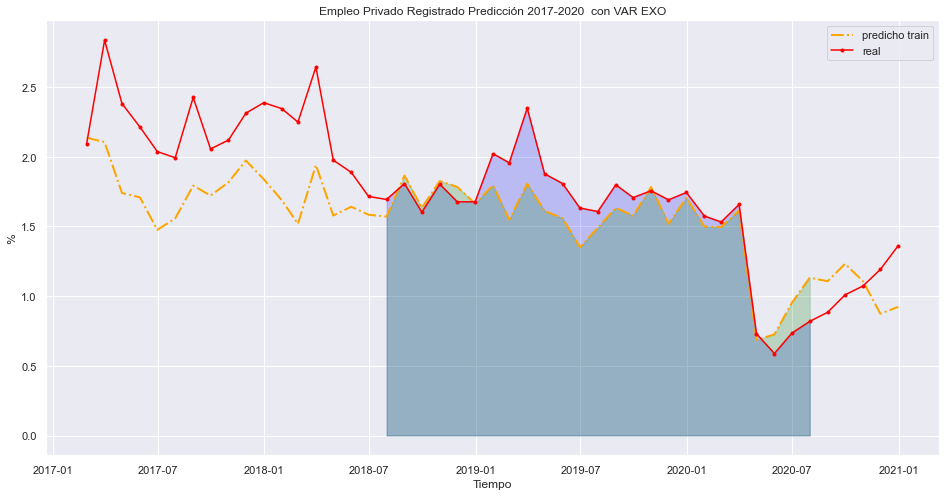

In [213]:
plt.figure(figsize=(16,8))
plt.plot(exog_act.work_mean_predicho,label="predicho train",ls='-.',lw =2,color="orange")
plt.plot(pred_rmse.work_mean,label="real",marker=".",color="red")

cond_exo1 = (exog_act.index>"2018-06-30") & (exog_act.index<"2020-08-31")
cond_exo2 = (pred_rmse.index>"2018-06-30") & (pred_rmse.index<"2020-08-31")

plt.title("Empleo Privado Registrado Predicción 2017-2020  con VAR EXO")
plt.xlabel("Tiempo")
plt.ylabel("%")

plt.fill_between(pred_rmse.index,pred_rmse.work_mean,where=cond_exo2,alpha=0.2,color='blue')
plt.fill_between(exog_act.index,exog_act.work_mean_predicho,where=cond_exo1,alpha=0.2,color='green')

plt.legend()
plt.show()

### **Conclusión Final**

También se puede chequear este proyecto en Git [aquí](https://github.com/ciromzz/Flujo-vehicular-Extension) con los dataset utilizados.